# Netflix 데이터 분석


### 국가 마켓별 분포도

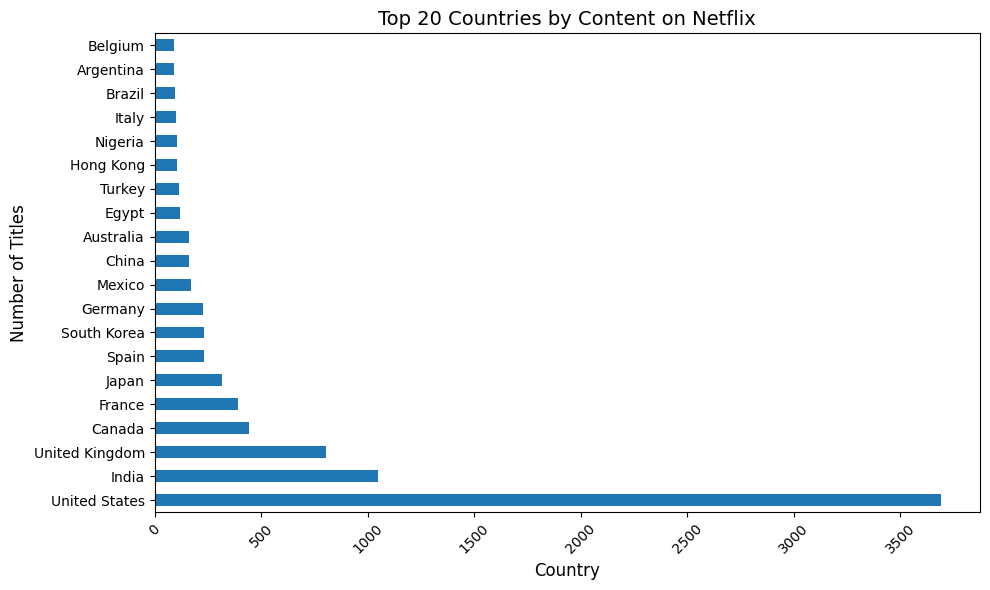

In [80]:
import pandas as pd
import matplotlib.pyplot as plt 

netflix_data = pd.read_csv('netflix_titles.csv') 

netflix_countries_split = netflix_data.dropna(subset=['country']).copy()
netflix_countries_split = netflix_countries_split.assign(
    country=netflix_countries_split['country'].str.split(', ')
).explode('country')

unique_country_counts = netflix_countries_split['country'].value_counts()

plt.figure(figsize=(10, 6))
unique_country_counts.head(20).plot(kind='barh')
plt.title('Top 20 Countries by Content on Netflix', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

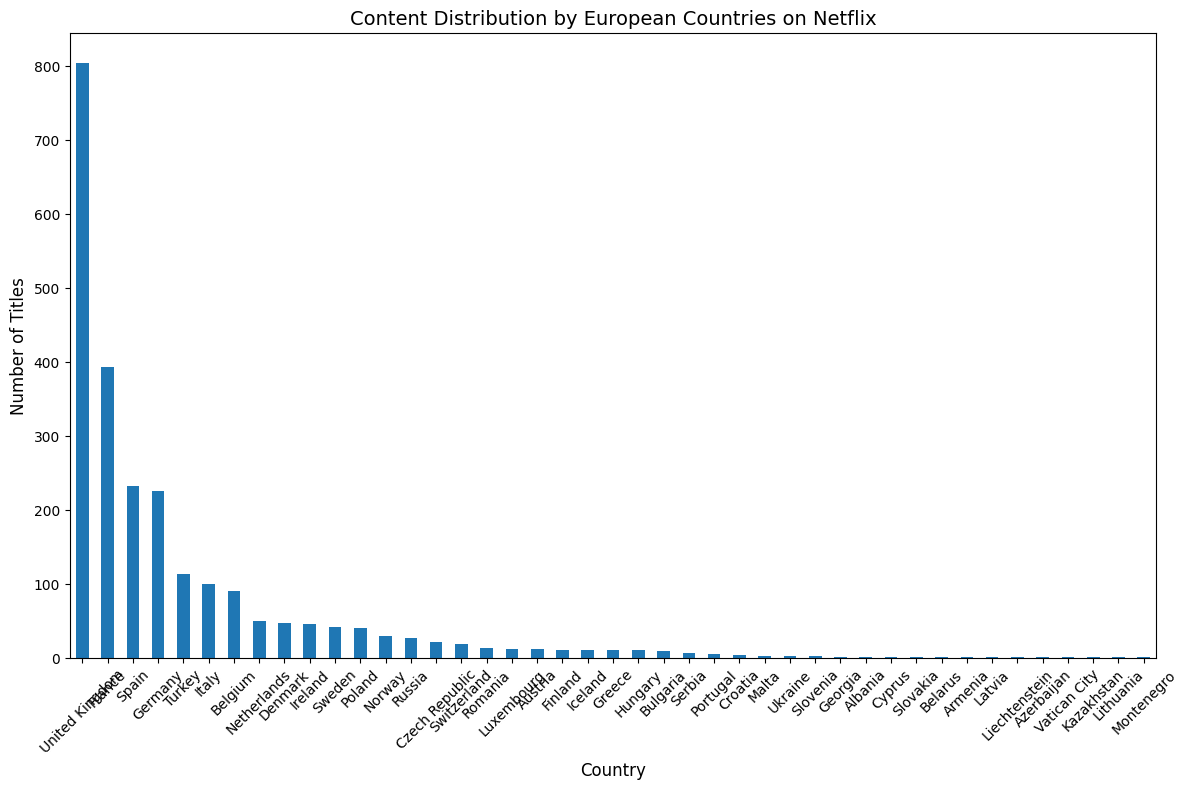

In [31]:
# 유럽분포
european_countries = [
    "Albania", "Andorra", "Armenia", "Austria", "Azerbaijan", "Belarus", "Belgium", "Bosnia and Herzegovina",
    "Bulgaria", "Croatia", "Cyprus", "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Georgia", 
    "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Kazakhstan", "Kosovo", "Latvia", "Liechtenstein", 
    "Lithuania", "Luxembourg", "Malta", "Moldova", "Monaco", "Montenegro", "Netherlands", "North Macedonia", 
    "Norway", "Poland", "Portugal", "Romania", "Russia", "San Marino", "Serbia", "Slovakia", "Slovenia", "Spain", 
    "Sweden", "Switzerland", "Turkey", "Ukraine", "United Kingdom", "Vatican City"
]
european_content = netflix_countries_split[netflix_countries_split['country'].isin(european_countries)]

european_country_counts = european_content['country'].value_counts()

plt.figure(figsize=(12, 8))
european_country_counts.sort_values(ascending=False).plot(kind='bar')
plt.title('Content Distribution by European Countries on Netflix', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


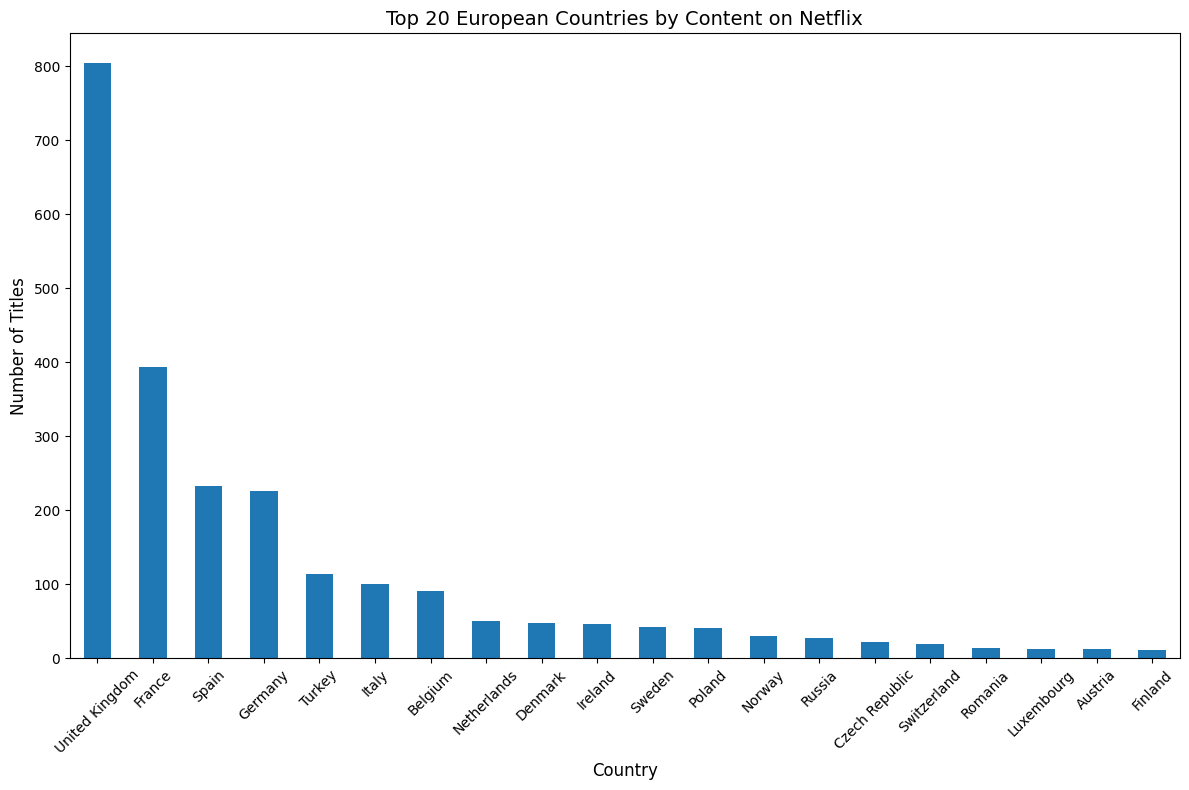

In [32]:
# Get top 20 European countries by content count
top_20_european_countries = european_country_counts.head(20)

# Plot top 20 European countries
plt.figure(figsize=(12, 8))
top_20_european_countries.sort_values(ascending=False).plot(kind='bar')
plt.title('Top 20 European Countries by Content on Netflix', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


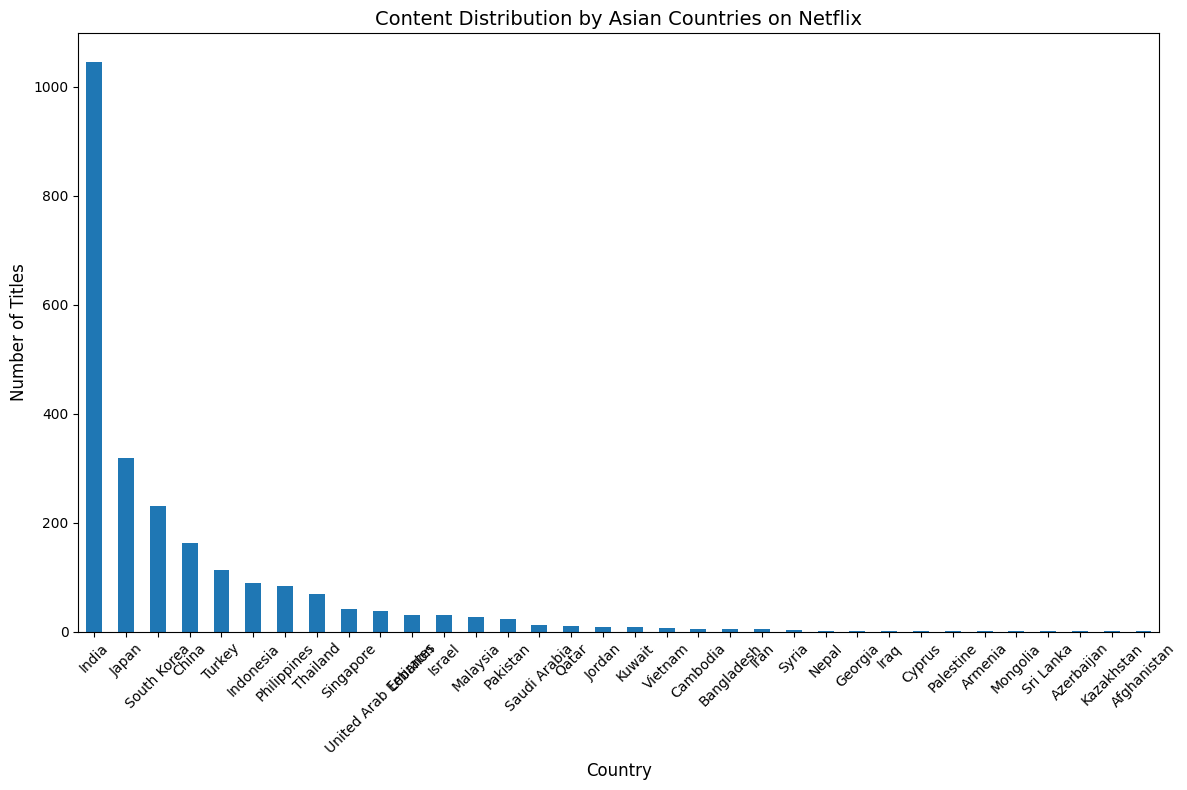

In [33]:
# 아시아
asian_countries = [
    "Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan", "Brunei", "Cambodia", "China", 
    "Cyprus", "Georgia", "India", "Indonesia", "Iran", "Iraq", "Israel", "Japan", "Jordan", "Kazakhstan", "Kuwait", 
    "Kyrgyzstan", "Laos", "Lebanon", "Malaysia", "Maldives", "Mongolia", "Myanmar", "Nepal", "North Korea", "Oman", 
    "Pakistan", "Palestine", "Philippines", "Qatar", "Saudi Arabia", "Singapore", "South Korea", "Sri Lanka", "Syria", 
    "Tajikistan", "Thailand", "Timor-Leste", "Turkey", "Turkmenistan", "United Arab Emirates", "Uzbekistan", "Vietnam", 
    "Yemen"
]

netflix_countries_split = netflix_data.dropna(subset=['country']).copy()
netflix_countries_split = netflix_countries_split.assign(
    country=netflix_countries_split['country'].str.split(', ')
).explode('country')

asian_content = netflix_countries_split[netflix_countries_split['country'].isin(asian_countries)]

asian_country_counts = asian_content['country'].value_counts()

plt.figure(figsize=(12, 8))
asian_country_counts.sort_values(ascending=False).plot(kind='bar')
plt.title('Content Distribution by Asian Countries on Netflix', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


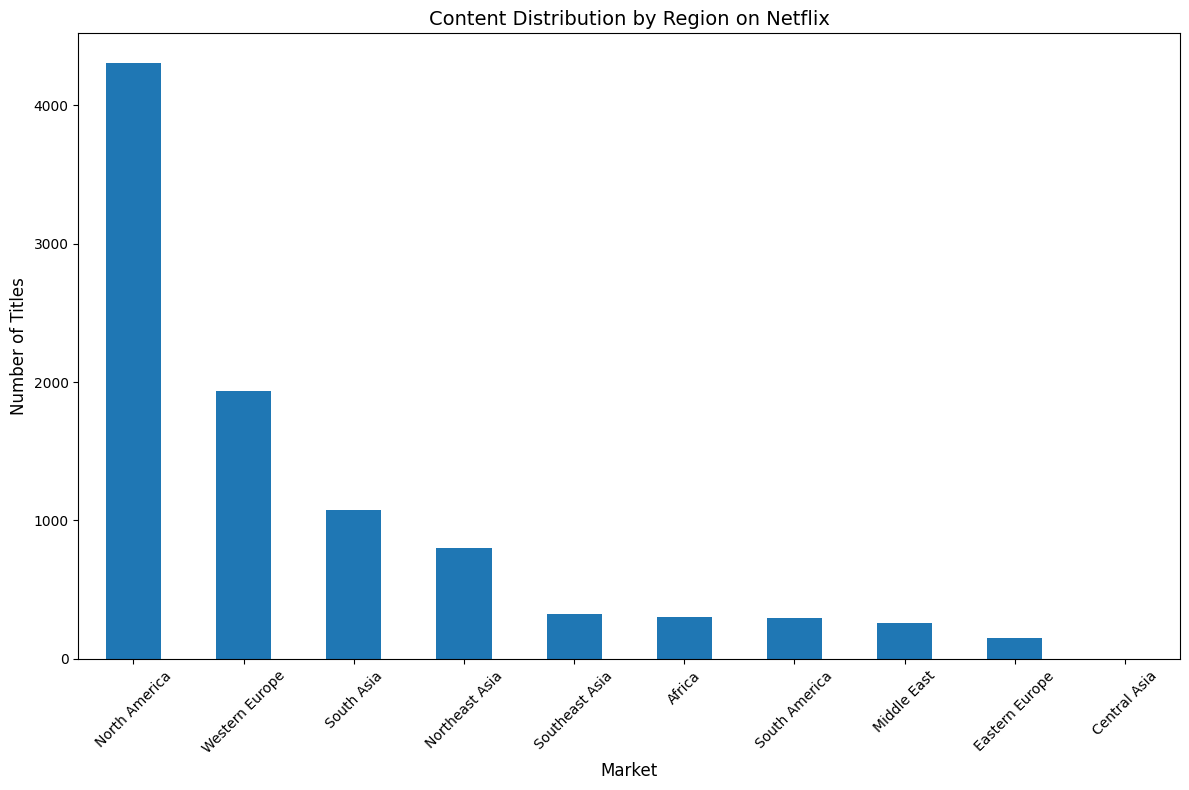

In [34]:
# 마켓별
region_mapping = {
    "Northeast Asia": ["China", "Japan", "South Korea", "Mongolia", "Taiwan"],
    "Southeast Asia": ["Vietnam", "Thailand", "Philippines", "Indonesia", "Malaysia", "Singapore", "Myanmar", "Cambodia", "Laos", "Brunei", "Timor-Leste"],
    "South Asia": ["India", "Pakistan", "Bangladesh", "Sri Lanka", "Nepal", "Maldives", "Bhutan"],
    "Middle East": ["Saudi Arabia", "Iran", "Iraq", "Israel", "Jordan", "Lebanon", "Syria", "Turkey", "Yemen", "United Arab Emirates", "Qatar", "Oman", "Bahrain", "Palestine", "Kuwait"],
    "North America": ["United States", "Canada", "Mexico"],
    "South America": ["Brazil", "Argentina", "Colombia", "Chile", "Peru", "Venezuela", "Ecuador", "Uruguay", "Paraguay", "Bolivia", "Guyana", "Suriname"],
    "Western Europe": ["France", "Germany", "United Kingdom", "Italy", "Spain", "Netherlands", "Belgium", "Switzerland", "Austria", "Luxembourg", "Monaco", "Andorra"],
    "Eastern Europe": ["Russia", "Poland", "Ukraine", "Czech Republic", "Slovakia", "Hungary", "Romania", "Bulgaria", "Serbia", "Croatia", "Bosnia and Herzegovina", "Montenegro", "North Macedonia", "Slovenia", "Belarus", "Georgia", "Armenia", "Azerbaijan", "Moldova"],
    "Africa": ["South Africa", "Nigeria", "Egypt", "Kenya", "Ethiopia", "Ghana", "Morocco", "Algeria", "Tunisia", "Libya", "Sudan"],
    "Central Asia": ["Kazakhstan", "Uzbekistan", "Turkmenistan", "Kyrgyzstan", "Tajikistan"]
}

country_to_region = {country: region for region, countries in region_mapping.items() for country in countries}

netflix_countries_split['region'] = netflix_countries_split['country'].map(country_to_region)

region_counts = netflix_countries_split['region'].value_counts()
plt.figure(figsize=(12, 8))
region_counts.sort_values(ascending=False).plot(kind='bar')
plt.title('Content Distribution by Region on Netflix', fontsize=14)
plt.xlabel('Market', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


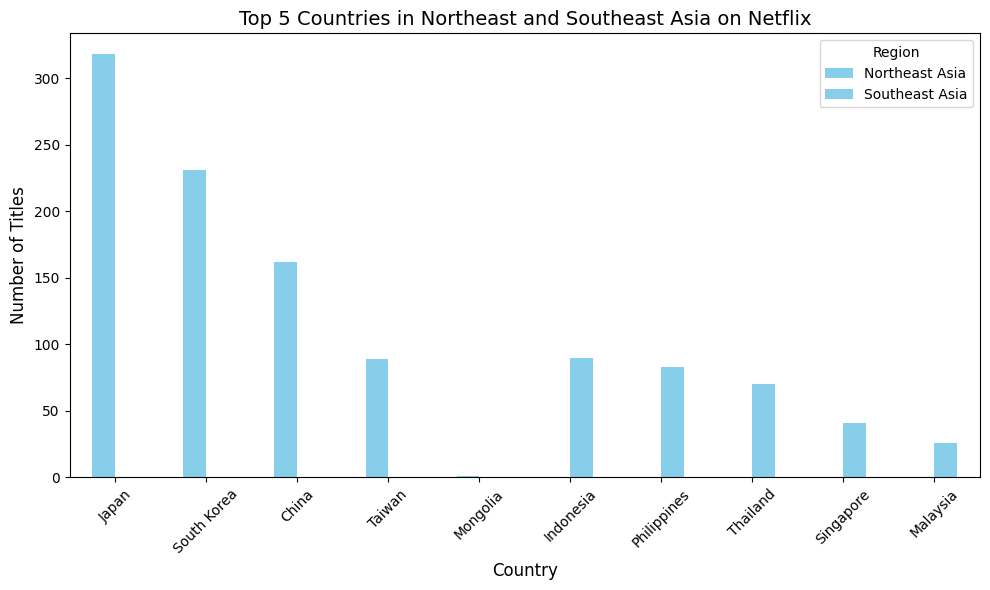

In [35]:
# Filter data for Northeast Asia and Southeast Asia
northeast_asia = region_mapping["Northeast Asia"]
southeast_asia = region_mapping["Southeast Asia"]

northeast_asia_data = netflix_countries_split[netflix_countries_split['country'].isin(northeast_asia)]
southeast_asia_data = netflix_countries_split[netflix_countries_split['country'].isin(southeast_asia)]

northeast_asia_counts = northeast_asia_data['country'].value_counts()
southeast_asia_counts = southeast_asia_data['country'].value_counts()

combined_top_5 = pd.concat([
    northeast_asia_counts.head(5).rename("Northeast Asia"),
    southeast_asia_counts.head(5).rename("Southeast Asia")
], axis=1)

combined_top_5.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 5 Countries in Northeast and Southeast Asia on Netflix', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Region', loc='upper right', labels=['Northeast Asia', 'Southeast Asia'])
plt.tight_layout()
plt.show()



### Family-friendly 관련

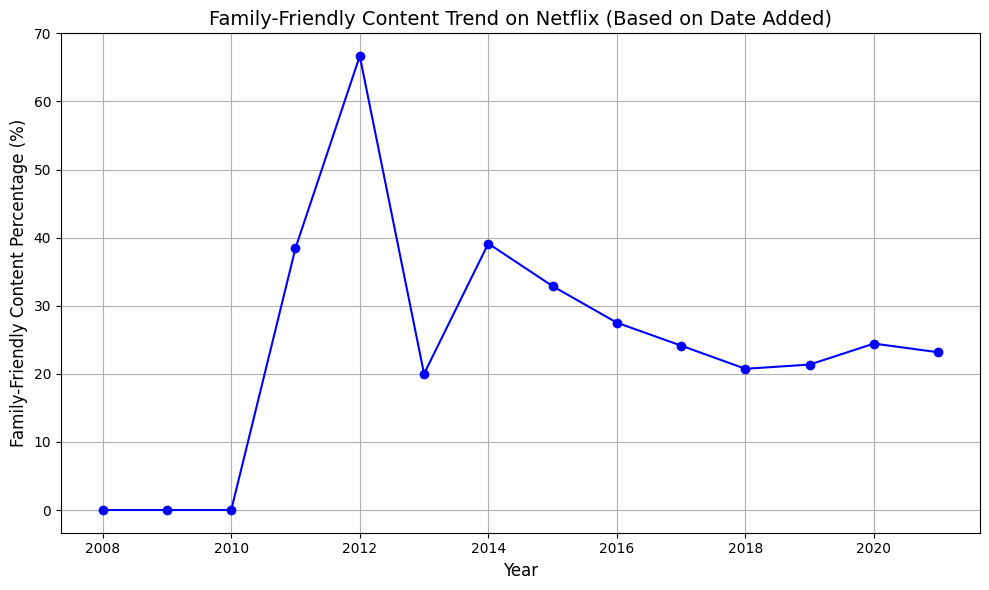

In [36]:
# Define family-friendly ratings
family_friendly_ratings = [
    "G", "PG", "TV-Y", "TV-Y7", "TV-G", "TV-PG"
]
netflix_data['family_friendly'] = netflix_data['rating'].isin(family_friendly_ratings)
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'], errors='coerce')
netflix_data['added_year'] = netflix_data['date_added'].dt.year
family_friendly_trend = netflix_data.groupby('added_year')['family_friendly'].mean() * 100
family_friendly_trend = family_friendly_trend.dropna()


# Visualize the trend
plt.figure(figsize=(10, 6))
family_friendly_trend.plot(kind='line', marker='o', color='b')
plt.title('Family-Friendly Content Trend on Netflix (Based on Date Added)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Family-Friendly Content Percentage (%)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()




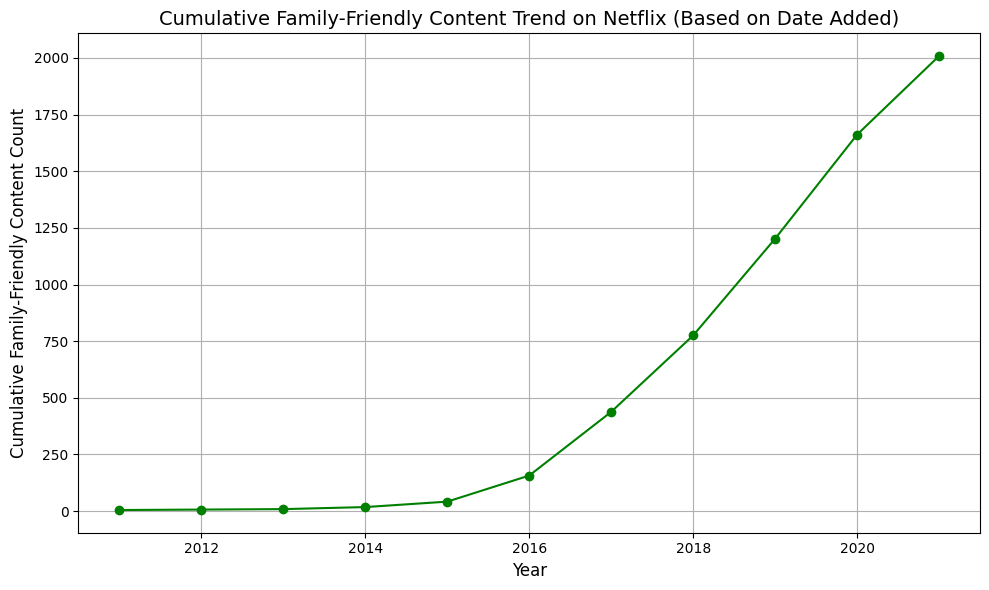

In [37]:
family_friendly_cumulative = netflix_data[netflix_data['family_friendly']].groupby('added_year').size().cumsum()

plt.figure(figsize=(10, 6))
family_friendly_cumulative.plot(kind='line', marker='o', color='g')
plt.title('Cumulative Family-Friendly Content Trend on Netflix (Based on Date Added)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Cumulative Family-Friendly Content Count', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()




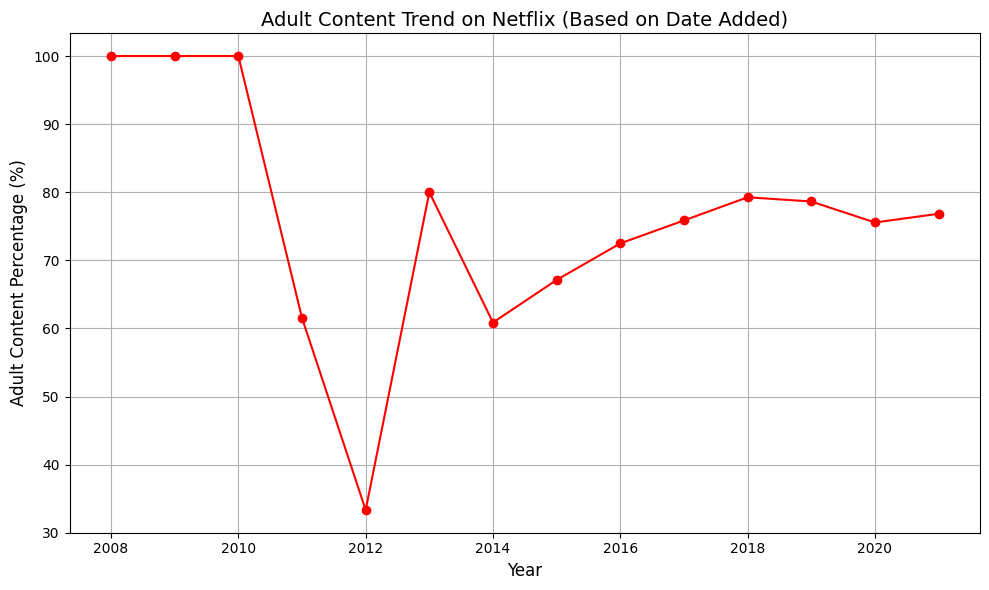

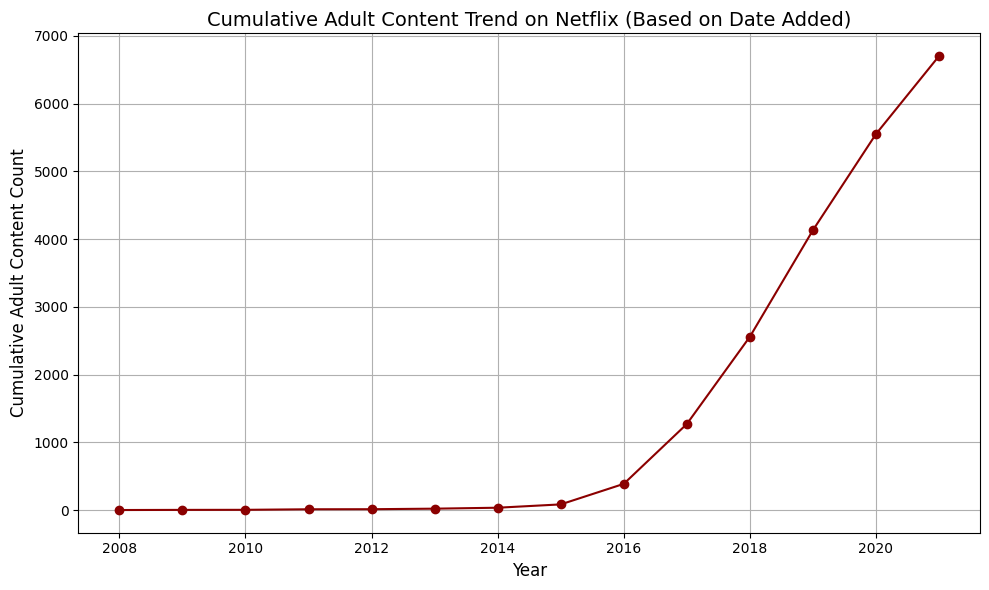

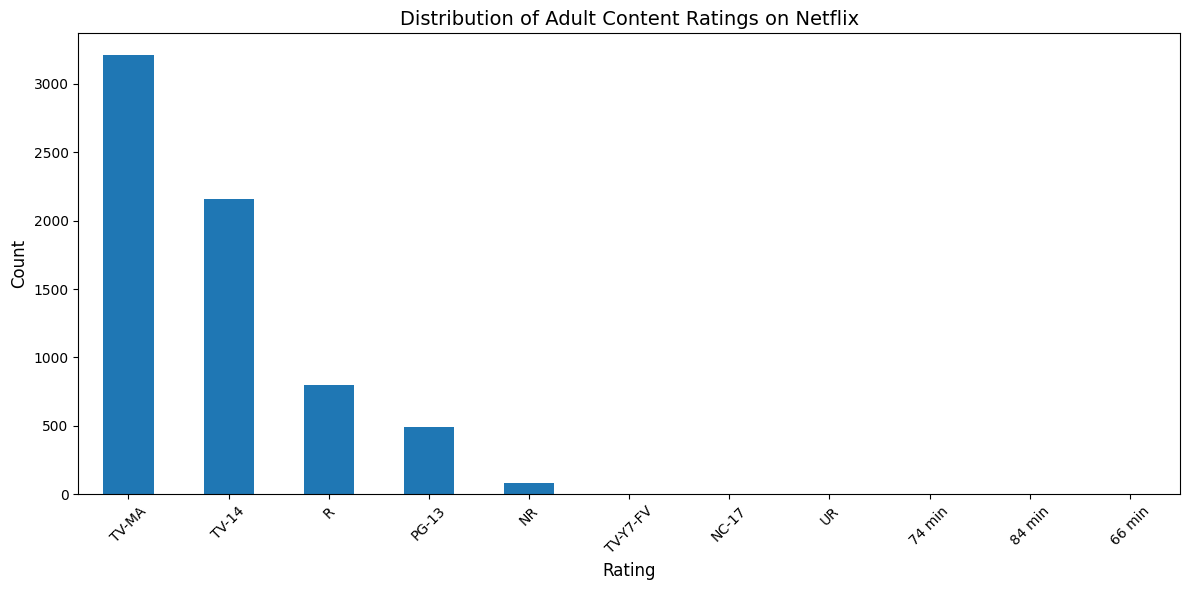

In [38]:
# 연도별 성인 콘텐츠 비율 추이
plt.figure(figsize=(10, 6))
non_family_trend = netflix_data.groupby('added_year')['family_friendly'].apply(lambda x: (~x).mean() * 100)
non_family_trend = non_family_trend.dropna()

non_family_trend.plot(kind='line', marker='o', color='r')
plt.title('Adult Content Trend on Netflix (Based on Date Added)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Adult Content Percentage (%)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
non_family_cumulative = netflix_data[~netflix_data['family_friendly']].groupby('added_year').size().cumsum()

non_family_cumulative.plot(kind='line', marker='o', color='darkred')
plt.title('Cumulative Adult Content Trend on Netflix (Based on Date Added)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Cumulative Adult Content Count', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
adult_ratings = netflix_data[~netflix_data['family_friendly']]['rating'].value_counts()
adult_ratings.plot(kind='bar')
plt.title('Distribution of Adult Content Ratings on Netflix', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

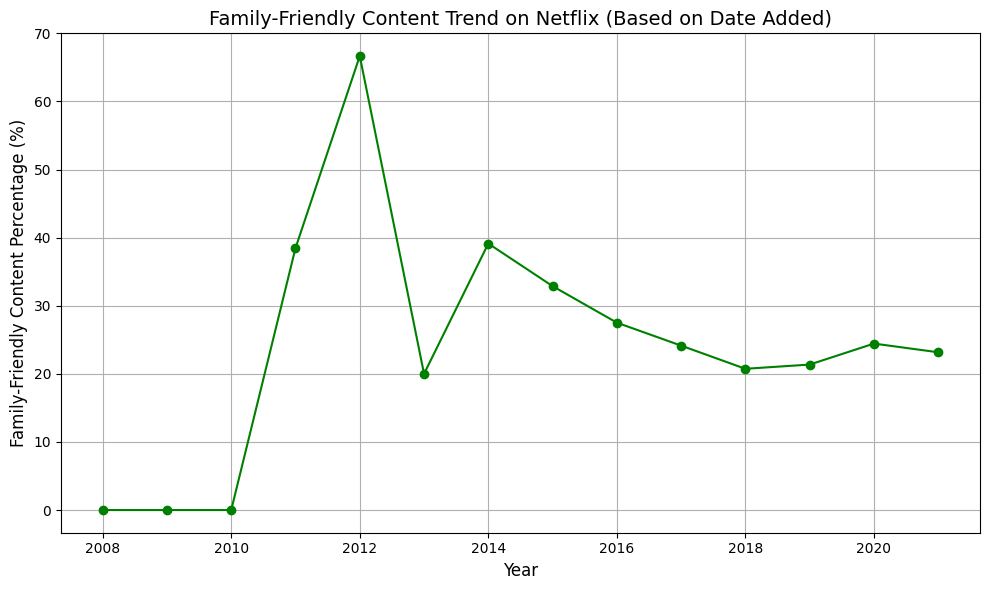


Family-Friendly Content Statistics:
Total Family-Friendly Content: 2052
Total Content: 8807
Overall Family-Friendly Percentage: 23.30%


In [39]:
# 연도별 family-friendly 콘텐츠 비율 추이
plt.figure(figsize=(10, 6))
family_trend = netflix_data.groupby('added_year')['family_friendly'].mean() * 100
family_trend = family_trend.dropna()

family_trend.plot(kind='line', marker='o', color='g')
plt.title('Family-Friendly Content Trend on Netflix (Based on Date Added)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Family-Friendly Content Percentage (%)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nFamily-Friendly Content Statistics:")
total_family = netflix_data['family_friendly'].sum()
total_content = len(netflix_data)
print(f"Total Family-Friendly Content: {total_family}")
print(f"Total Content: {total_content}")
print(f"Overall Family-Friendly Percentage: {(total_family/total_content)*100:.2f}%")

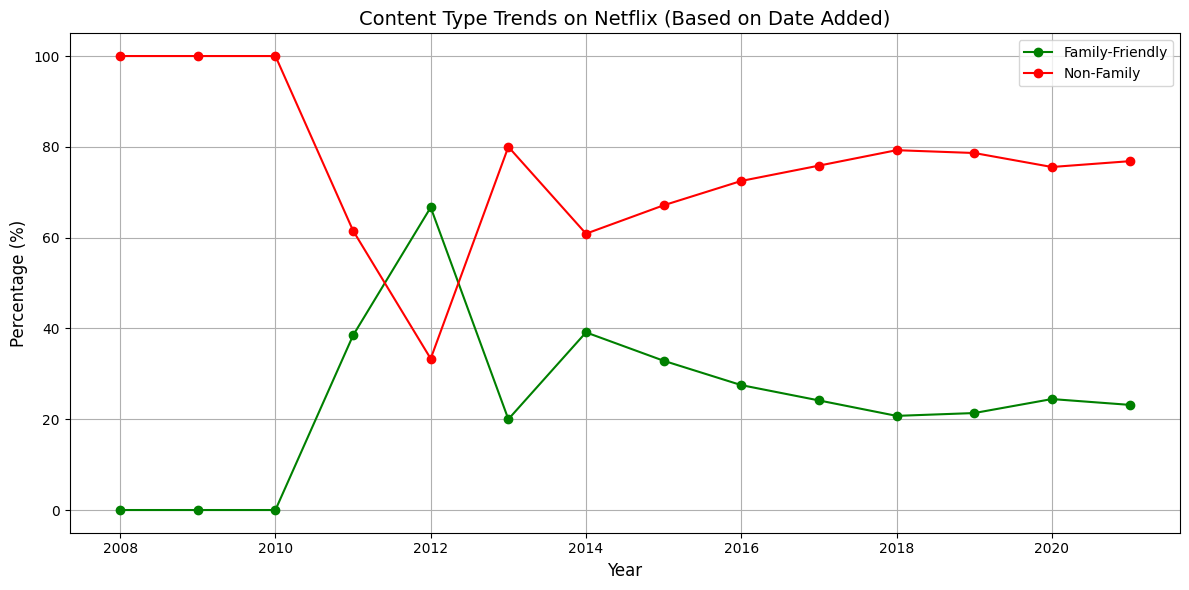


Content Statistics:
Total Family-Friendly Content: 2052 (23.30%)
Total Non-Family Content: 6755 (76.70%)
Total Content: 8807


In [40]:
# family-friendly와 non-family 콘텐츠 비율 추이 비교
plt.figure(figsize=(12, 6))

family_trend = netflix_data.groupby('added_year')['family_friendly'].mean() * 100
family_trend = family_trend.dropna()

non_family_trend = netflix_data.groupby('added_year')['family_friendly'].apply(lambda x: (~x).mean() * 100)
non_family_trend = non_family_trend.dropna()

family_trend.plot(kind='line', marker='o', color='g', label='Family-Friendly')
non_family_trend.plot(kind='line', marker='o', color='r', label='Non-Family')

plt.title('Content Type Trends on Netflix (Based on Date Added)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print("\nContent Statistics:")
total_family = netflix_data['family_friendly'].sum()
total_content = len(netflix_data)
print(f"Total Family-Friendly Content: {total_family} ({(total_family/total_content)*100:.2f}%)")
print(f"Total Non-Family Content: {total_content - total_family} ({((total_content-total_family)/total_content)*100:.2f}%)")
print(f"Total Content: {total_content}")

In [41]:
# 연도별 non-family 콘텐츠 수 계산
non_family_counts = netflix_data[~netflix_data['family_friendly']].groupby('added_year').size()

# 전체 콘텐츠 수와 비율도 함께 표시
total_counts = netflix_data.groupby('added_year').size()
non_family_ratio = (non_family_counts / total_counts * 100).round(2)

# 결과를 데이터프레임으로 만들기
results = pd.DataFrame({
    'Non-Family Count': non_family_counts,
    'Total Content': total_counts,
    'Non-Family Percentage (%)': non_family_ratio
})

print("Non-Family Content by Year:")
print(results)

# 전체 통계도 출력
print("\nOverall Statistics:")
total_non_family = netflix_data[~netflix_data['family_friendly']].shape[0]
total_content = len(netflix_data)
print(f"Total Non-Family Content: {total_non_family}")
print(f"Total Content: {total_content}")
print(f"Overall Non-Family Percentage: {(total_non_family/total_content)*100:.2f}%")


Non-Family Content by Year:
            Non-Family Count  Total Content  Non-Family Percentage (%)
added_year                                                            
2008.0                     2              2                     100.00
2009.0                     2              2                     100.00
2010.0                     1              1                     100.00
2011.0                     8             13                      61.54
2012.0                     1              3                      33.33
2013.0                     8             10                      80.00
2014.0                    14             23                      60.87
2015.0                    49             73                      67.12
2016.0                   303            418                      72.49
2017.0                   883           1164                      75.86
2018.0                  1288           1625                      79.26
2019.0                  1572           1999      

In [42]:
# 연도별 family-friendly와 non-family 콘텐츠 수 계산
family_counts = netflix_data[netflix_data['family_friendly']].groupby('added_year').size()
non_family_counts = netflix_data[~netflix_data['family_friendly']].groupby('added_year').size()

total_counts = netflix_data.groupby('added_year').size()
family_ratio = (family_counts / total_counts * 100).round(2)
non_family_ratio = (non_family_counts / total_counts * 100).round(2)


results = pd.DataFrame({
    'Family-Friendly Count': family_counts,
    'Family-Friendly (%)': family_ratio,
    'Non-Family Count': non_family_counts,
    'Non-Family (%)': non_family_ratio,
    'Total Content': total_counts
})

print("Content Distribution by Year:")
print(results)


print("\nOverall Statistics:")
total_family = netflix_data[netflix_data['family_friendly']].shape[0]
total_non_family = netflix_data[~netflix_data['family_friendly']].shape[0]
total_content = len(netflix_data)
print(f"Total Family-Friendly Content: {total_family} ({(total_family/total_content)*100:.2f}%)")
print(f"Total Non-Family Content: {total_non_family} ({(total_non_family/total_content)*100:.2f}%)")
print(f"Total Content: {total_content}")

Content Distribution by Year:
            Family-Friendly Count  Family-Friendly (%)  Non-Family Count  \
added_year                                                                 
2008.0                        NaN                  NaN                 2   
2009.0                        NaN                  NaN                 2   
2010.0                        NaN                  NaN                 1   
2011.0                        5.0                38.46                 8   
2012.0                        2.0                66.67                 1   
2013.0                        2.0                20.00                 8   
2014.0                        9.0                39.13                14   
2015.0                       24.0                32.88                49   
2016.0                      115.0                27.51               303   
2017.0                      281.0                24.14               883   
2018.0                      337.0                20.74    

### 장르 추이

<Figure size 5000x2800 with 0 Axes>

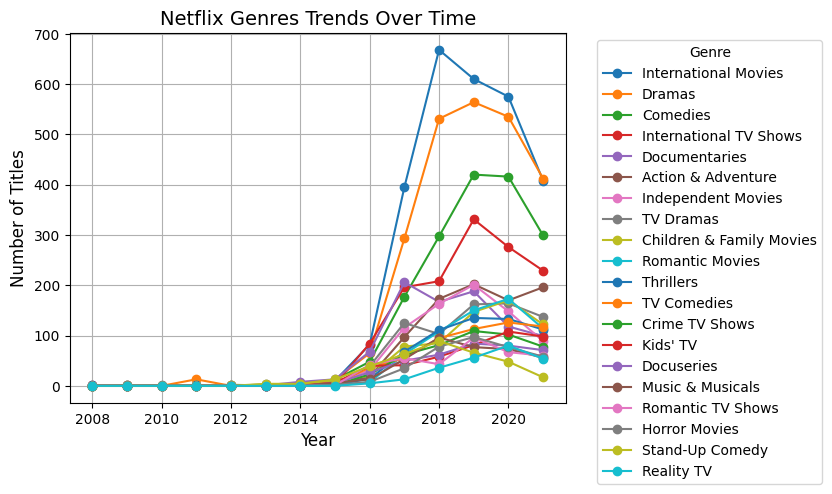


Genres Overall:
International Movies: 2752 titles
Dramas: 2427 titles
Comedies: 1674 titles
International TV Shows: 1328 titles
Documentaries: 869 titles
Action & Adventure: 859 titles
Independent Movies: 756 titles
TV Dramas: 739 titles
Children & Family Movies: 641 titles
Romantic Movies: 616 titles
Thrillers: 577 titles
TV Comedies: 550 titles
Crime TV Shows: 459 titles
Kids' TV: 433 titles
Docuseries: 380 titles
Music & Musicals: 375 titles
Romantic TV Shows: 364 titles
Horror Movies: 357 titles
Stand-Up Comedy: 343 titles
Reality TV: 244 titles


In [59]:
# 장르 추이 분석
# 전처리
genre_data = netflix_data.dropna(subset=['listed_in']).copy()
genre_data = genre_data.assign(
    listed_in=genre_data['listed_in'].str.split(', ')
).explode('listed_in')

# 연도별 장르 카운트
genre_trends = genre_data.groupby(['added_year', 'listed_in']).size().unstack(fill_value=0)
top_genres = genre_trends.sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(50, 28))
genre_trends[top_genres.index].plot(kind='line', marker='o')
plt.title('Netflix Genres Trends Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
# plt.tight_layout()
plt.show()

print("\nGenres Overall:")
for genre, count in top_genres.items():
    print(f"{genre}: {int(count)} titles")

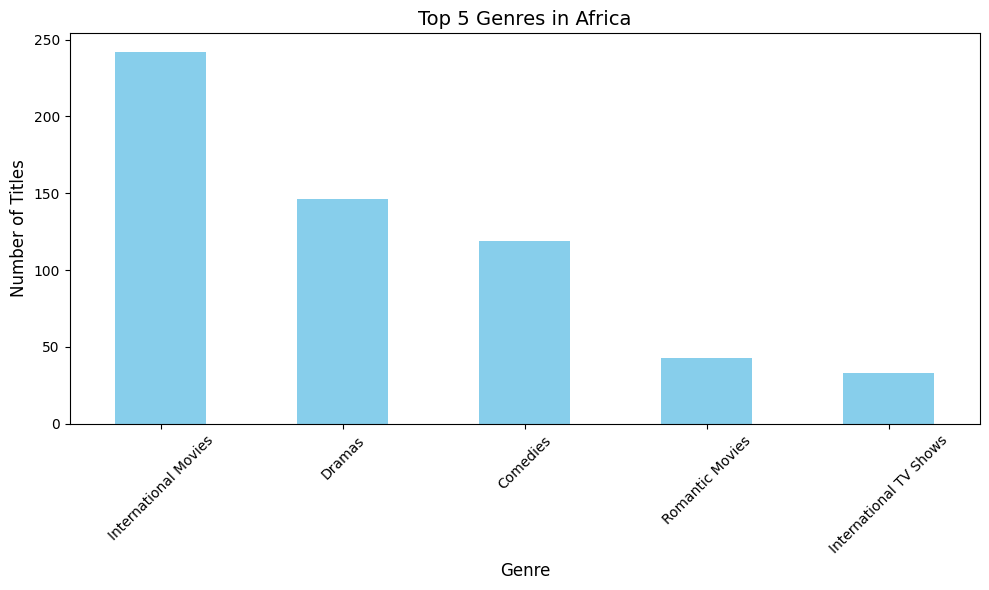

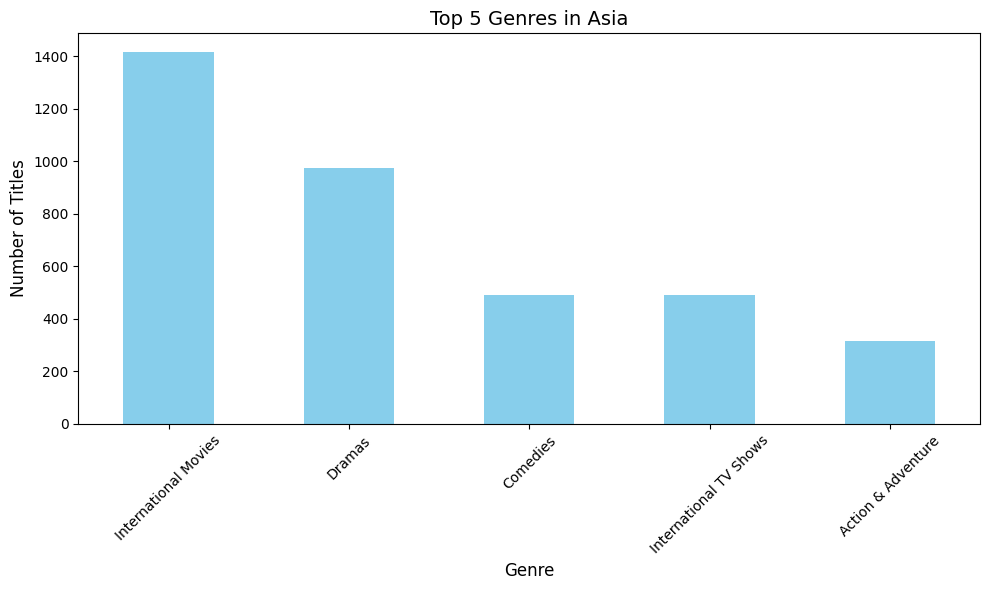

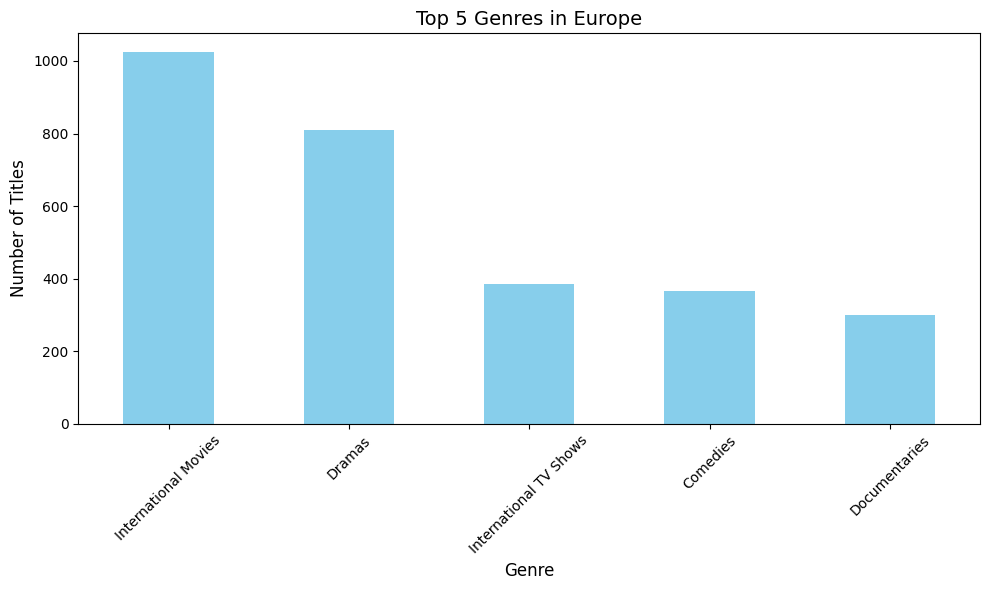

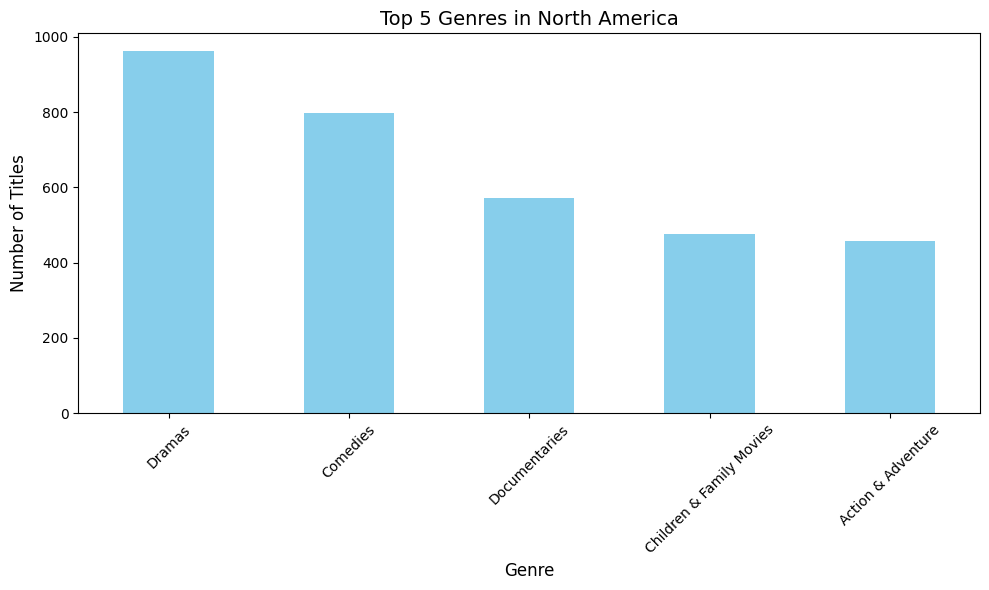

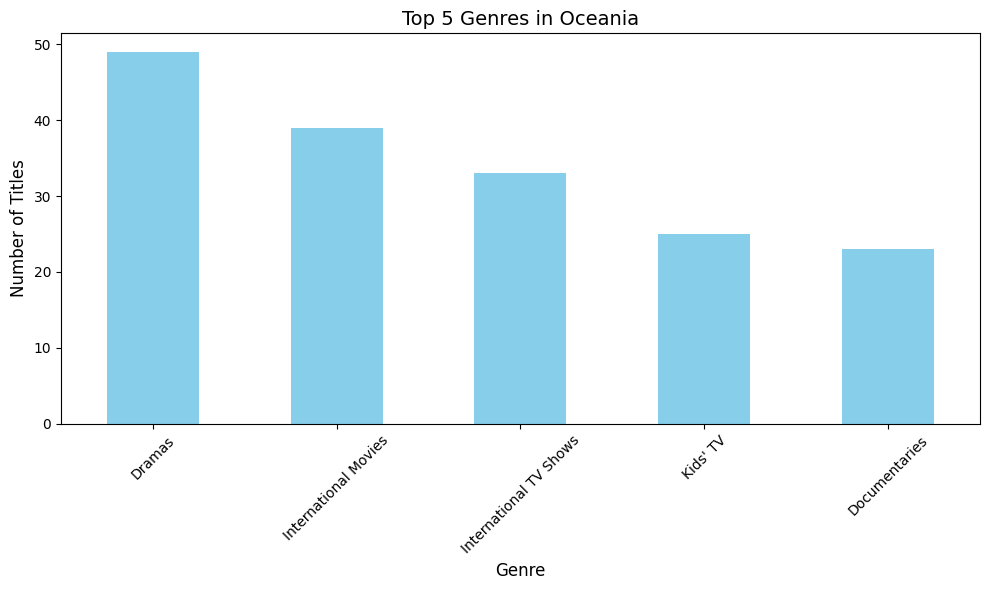

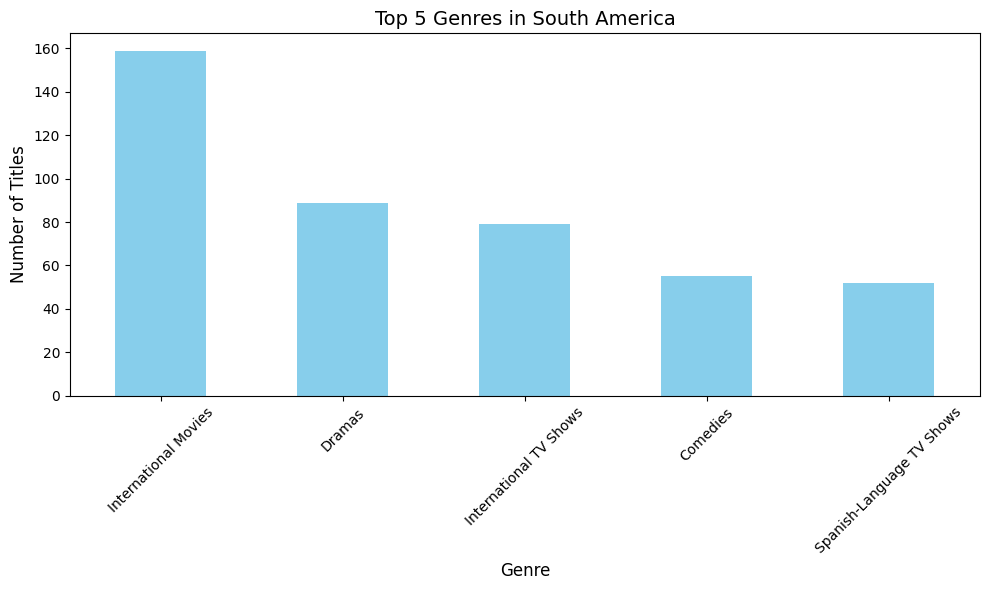

In [62]:
region_mapping = {
    "Asia": [
        "Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan", "Brunei", "Cambodia", "China", 
        "Cyprus", "Georgia", "India", "Indonesia", "Iran", "Iraq", "Israel", "Japan", "Jordan", "Kazakhstan", "Kuwait", 
        "Kyrgyzstan", "Laos", "Lebanon", "Malaysia", "Maldives", "Mongolia", "Myanmar", "Nepal", "North Korea", "Oman", 
        "Pakistan", "Palestine", "Philippines", "Qatar", "Saudi Arabia", "Singapore", "South Korea", "Sri Lanka", "Syria", 
        "Tajikistan", "Thailand", "Timor-Leste", "Turkey", "Turkmenistan", "United Arab Emirates", "Uzbekistan", "Vietnam", 
        "Yemen"
    ],
    "Europe": [
        "Albania", "Andorra", "Armenia", "Austria", "Azerbaijan", "Belarus", "Belgium", "Bosnia and Herzegovina",
        "Bulgaria", "Croatia", "Cyprus", "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Georgia", 
        "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Kazakhstan", "Kosovo", "Latvia", "Liechtenstein", 
        "Lithuania", "Luxembourg", "Malta", "Moldova", "Monaco", "Montenegro", "Netherlands", "North Macedonia", 
        "Norway", "Poland", "Portugal", "Romania", "Russia", "San Marino", "Serbia", "Slovakia", "Slovenia", "Spain", 
        "Sweden", "Switzerland", "Turkey", "Ukraine", "United Kingdom", "Vatican City"
    ],
    "North America": ["United States", "Canada", "Mexico"],
    "South America": [
        "Brazil", "Argentina", "Colombia", "Chile", "Peru", "Venezuela", "Ecuador", "Uruguay", "Paraguay", "Bolivia", 
        "Guyana", "Suriname"
    ],
    "Africa": [
        "South Africa", "Nigeria", "Egypt", "Kenya", "Ethiopia", "Ghana", "Morocco", "Algeria", "Tunisia", "Libya", 
        "Sudan"
    ],
    "Oceania": ["Australia", "New Zealand", "Fiji", "Papua New Guinea", "Tonga", "Samoa"]
}


country_to_continent = {country: continent for continent, countries in region_mapping.items() for country in countries}
netflix_data_exploded = netflix_data.dropna(subset=['country']).assign(
    country=netflix_data['country'].str.split(', ')
).explode('country').reset_index(drop=True)

netflix_data_exploded['continent'] = netflix_data_exploded['country'].map(country_to_continent)

continent_genres_split = netflix_data_exploded.dropna(subset=['listed_in', 'continent']).copy()
continent_genres_split = continent_genres_split.assign(
    listed_in=continent_genres_split['listed_in'].str.split(', ')
).explode('listed_in')

genres_by_continent = continent_genres_split.groupby(['continent', 'listed_in']).size().unstack(fill_value=0)

for continent in genres_by_continent.index:
    top_genres_continent = genres_by_continent.loc[continent].sort_values(ascending=False).head(5)
    plt.figure(figsize=(10, 6))
    top_genres_continent.plot(kind='bar', color='skyblue')
    plt.title(f'Top 5 Genres in {continent}', fontsize=14)
    plt.xlabel('Genre', fontsize=12)
    plt.ylabel('Number of Titles', fontsize=12)
    plt.xticks(rotation=45)
    plt.gca().set_ylim(bottom=0)  # Set the lower limit of y-axis to 0
    plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9, hspace=0.4, wspace=0.4)  # Adjust spacing
    plt.tight_layout()
    plt.show()


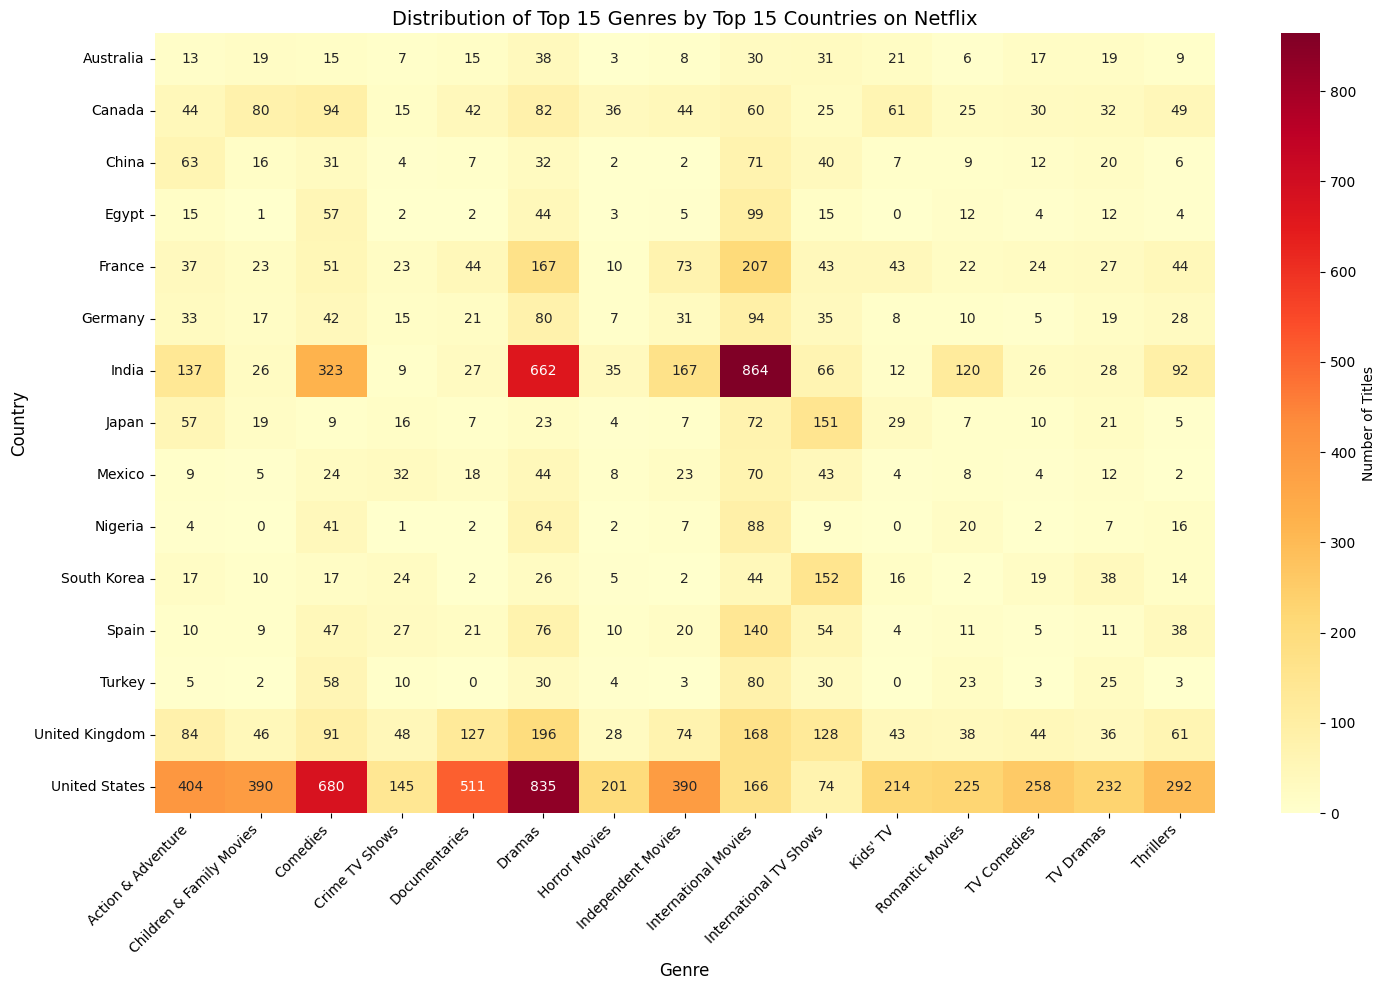

In [75]:
import seaborn as sns

# 데이터 전처리
country_genre_split = netflix_data.dropna(subset=['country', 'listed_in']).copy()
country_genre_split = country_genre_split.assign(
    country=country_genre_split['country'].str.split(', '),
    listed_in=country_genre_split['listed_in'].str.split(', ')
).explode('country').explode('listed_in')

# 상위 15개 국가와 장르 선택
top_countries = country_genre_split['country'].value_counts().head(15).index
top_genres = country_genre_split['listed_in'].value_counts().head(15).index

# 중복을 제거하고 국가-장르 매트릭스 생성
country_genre_matrix = pd.DataFrame(
    country_genre_split[
        country_genre_split['country'].isin(top_countries) & 
        country_genre_split['listed_in'].isin(top_genres)
    ].groupby(['country', 'listed_in']).size()
).reset_index().pivot(index='country', columns='listed_in', values=0).fillna(0)

# 히트맵 시각화
plt.figure(figsize=(15, 10))
sns.heatmap(country_genre_matrix, cmap='YlOrRd', annot=True, fmt='.0f', cbar_kws={'label': 'Number of Titles'})
plt.title('Distribution of Top 15 Genres by Top 15 Countries on Netflix', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

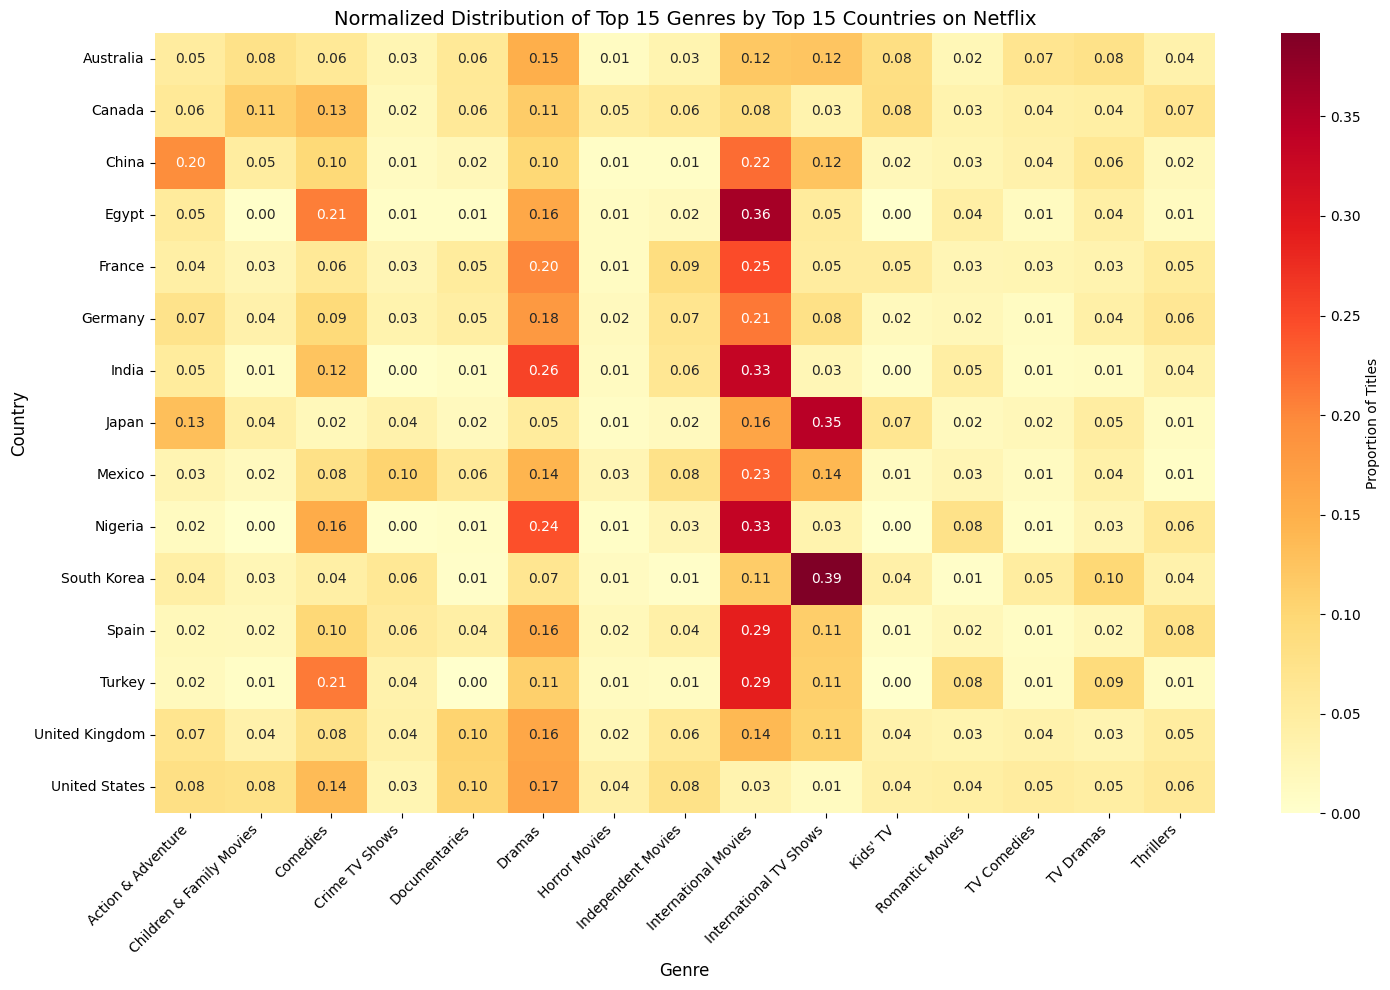

In [81]:
import seaborn as sns

country_genre_split = netflix_data.dropna(subset=['country', 'listed_in']).copy()
country_genre_split = country_genre_split.assign(
    country=country_genre_split['country'].str.split(', '),
    listed_in=country_genre_split['listed_in'].str.split(', ')
).explode('country').explode('listed_in')

top_countries = country_genre_split['country'].value_counts().head(15).index
top_genres = country_genre_split['listed_in'].value_counts().head(15).index

country_genre_matrix = pd.DataFrame(
    country_genre_split[
        country_genre_split['country'].isin(top_countries) & 
        country_genre_split['listed_in'].isin(top_genres)
    ].groupby(['country', 'listed_in']).size()
).reset_index().pivot(index='country', columns='listed_in', values=0).fillna(0)

# 정규화
country_genre_matrix_normalized = country_genre_matrix.div(country_genre_matrix.sum(axis=1), axis=0)

plt.figure(figsize=(15, 10))
sns.heatmap(country_genre_matrix_normalized, cmap='YlOrRd', annot=True, fmt='.2f', cbar_kws={'label': 'Proportion of Titles'})
plt.title('Normalized Distribution of Top 15 Genres by Top 15 Countries on Netflix', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

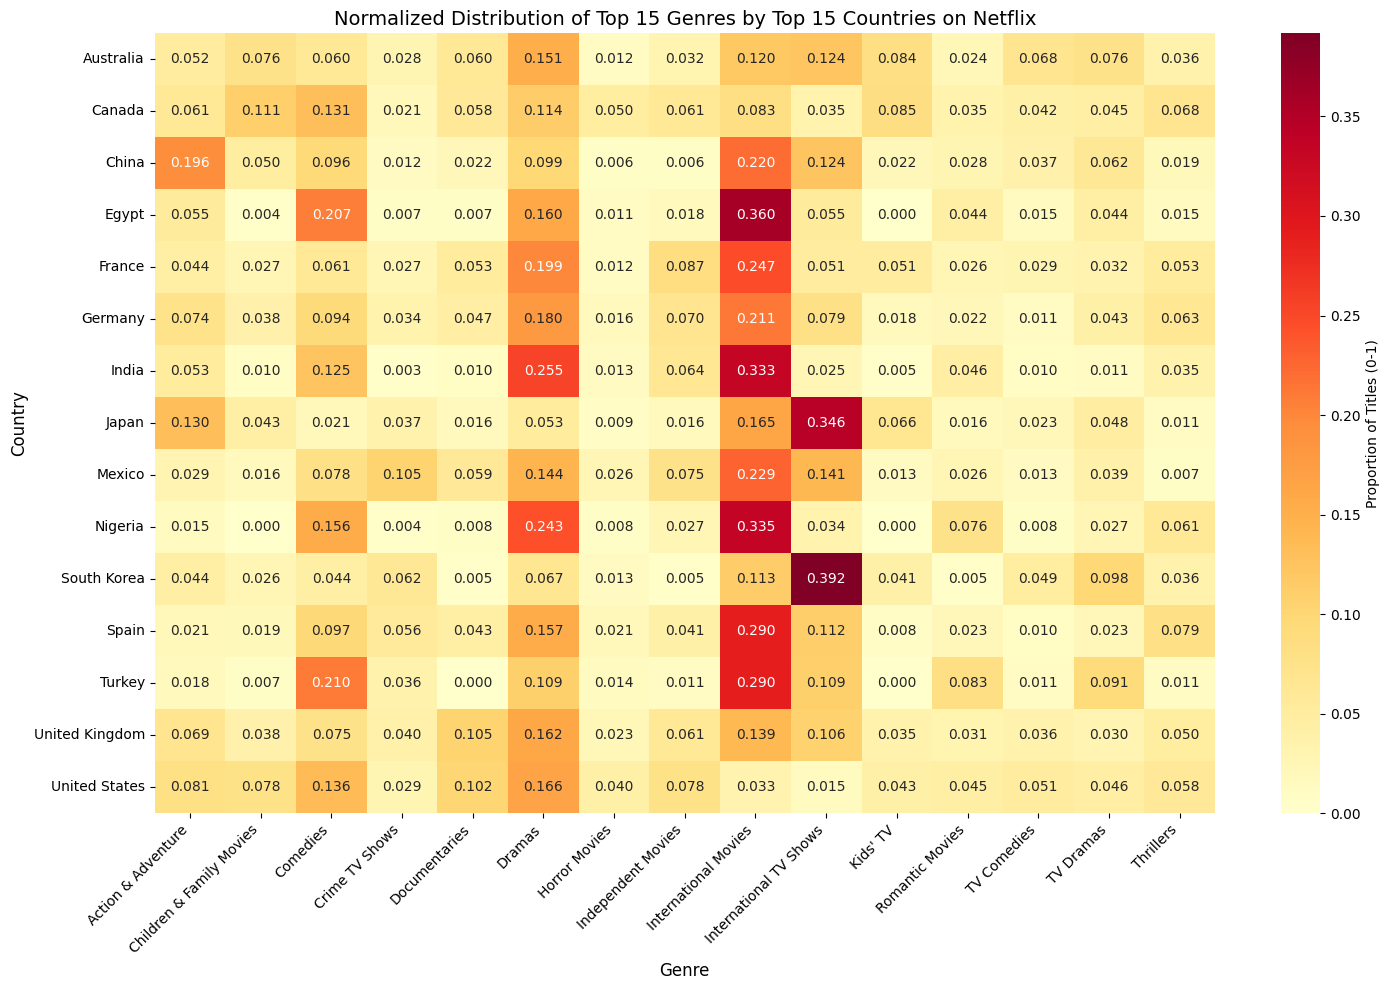

In [82]:
# 데이터 전처리 및 매트릭스 생성 (이전 코드와 동일)
...

# 정규화 수정
country_genre_matrix_normalized = country_genre_matrix.div(country_genre_matrix.sum(axis=1), axis=0)

# 히트맵에 표시할 때 퍼센트로 변환 (100을 곱하지 않음)
plt.figure(figsize=(15, 10))
sns.heatmap(country_genre_matrix_normalized, 
            cmap='YlOrRd', 
            annot=True, 
            fmt='.3f',  # 소수점 3자리까지 표시
            cbar_kws={'label': 'Proportion of Titles (0-1)'})
plt.title('Normalized Distribution of Top 15 Genres by Top 15 Countries on Netflix', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

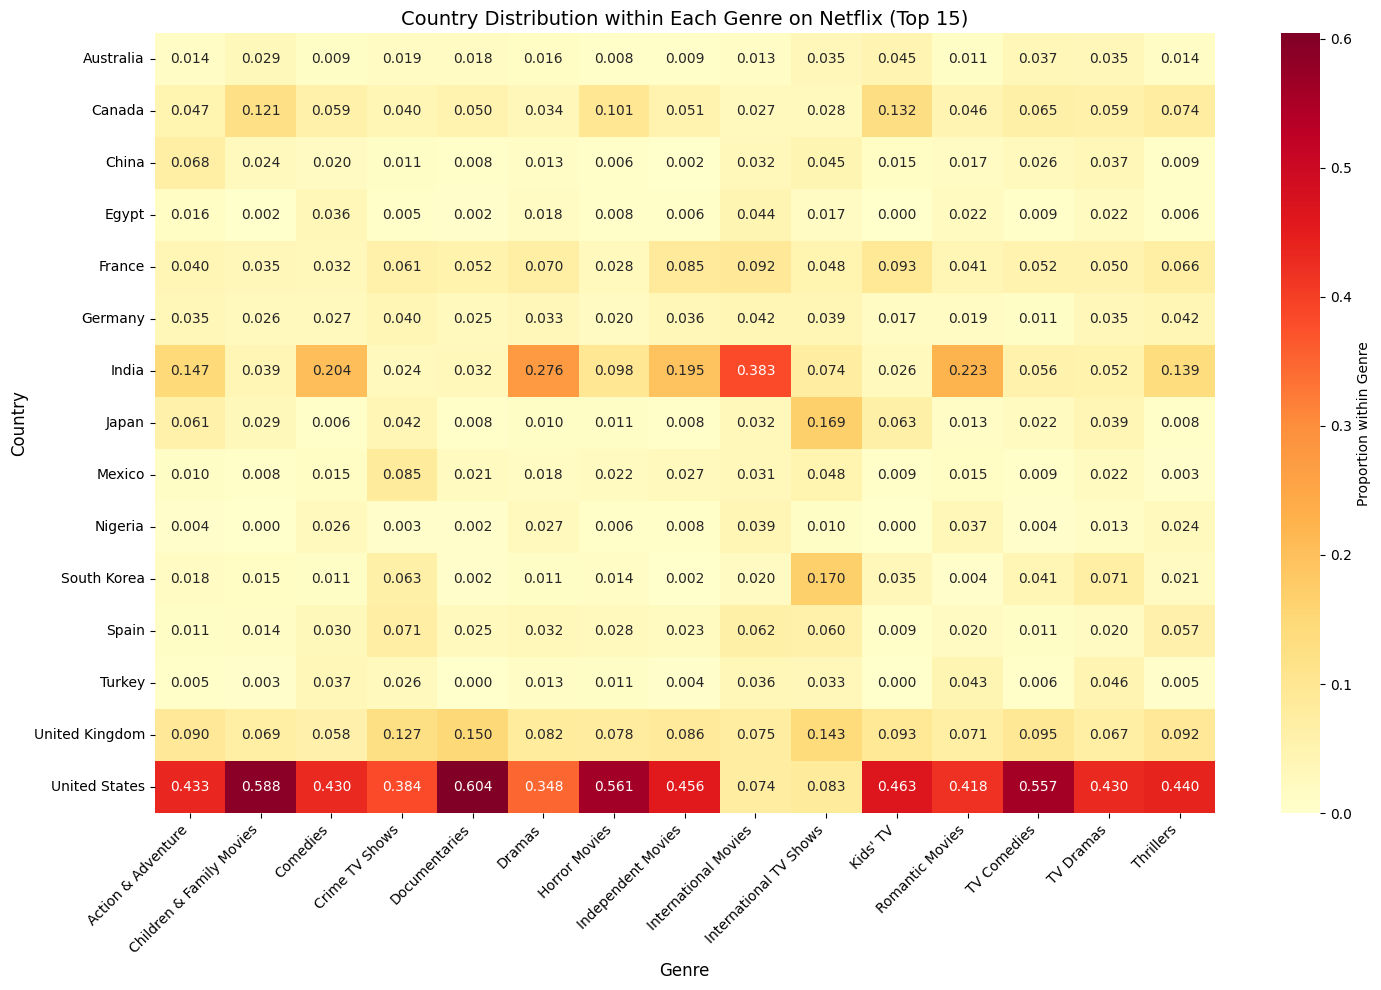


각 장르별 비율의 합:
listed_in
Action & Adventure          1.0
Children & Family Movies    1.0
Comedies                    1.0
Crime TV Shows              1.0
Documentaries               1.0
Dramas                      1.0
Horror Movies               1.0
Independent Movies          1.0
International Movies        1.0
International TV Shows      1.0
Kids' TV                    1.0
Romantic Movies             1.0
TV Comedies                 1.0
TV Dramas                   1.0
Thrillers                   1.0
dtype: float64


In [83]:
# 데이터 전처리 (이전과 동일)
country_genre_split = netflix_data.dropna(subset=['country', 'listed_in']).copy()
country_genre_split = country_genre_split.assign(
    country=country_genre_split['country'].str.split(', '),
    listed_in=country_genre_split['listed_in'].str.split(', ')
).explode('country').explode('listed_in')

# 상위 15개 국가와 장르 선택
top_countries = country_genre_split['country'].value_counts().head(15).index
top_genres = country_genre_split['listed_in'].value_counts().head(15).index

# 중복을 제거하고 국가-장르 매트릭스 생성
country_genre_matrix = pd.DataFrame(
    country_genre_split[
        country_genre_split['country'].isin(top_countries) & 
        country_genre_split['listed_in'].isin(top_genres)
    ].groupby(['country', 'listed_in']).size()
).reset_index().pivot(index='country', columns='listed_in', values=0).fillna(0)

# 열(장르)별로 정규화 - 각 장르에서 국가별 비중이 합이 1이 되도록
country_genre_matrix_normalized = country_genre_matrix.div(country_genre_matrix.sum(axis=0), axis=1)

# 히트맵 시각화
plt.figure(figsize=(15, 10))
sns.heatmap(country_genre_matrix_normalized, 
            cmap='YlOrRd', 
            annot=True, 
            fmt='.3f',
            cbar_kws={'label': 'Proportion within Genre'})
plt.title('Country Distribution within Each Genre on Netflix (Top 15)', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 검증을 위해 각 장르(열)의 합 출력
column_sums = country_genre_matrix_normalized.sum(axis=0)
print("\n각 장르별 비율의 합:")
print(column_sums)  # 모든 값이 1.0이어야 함

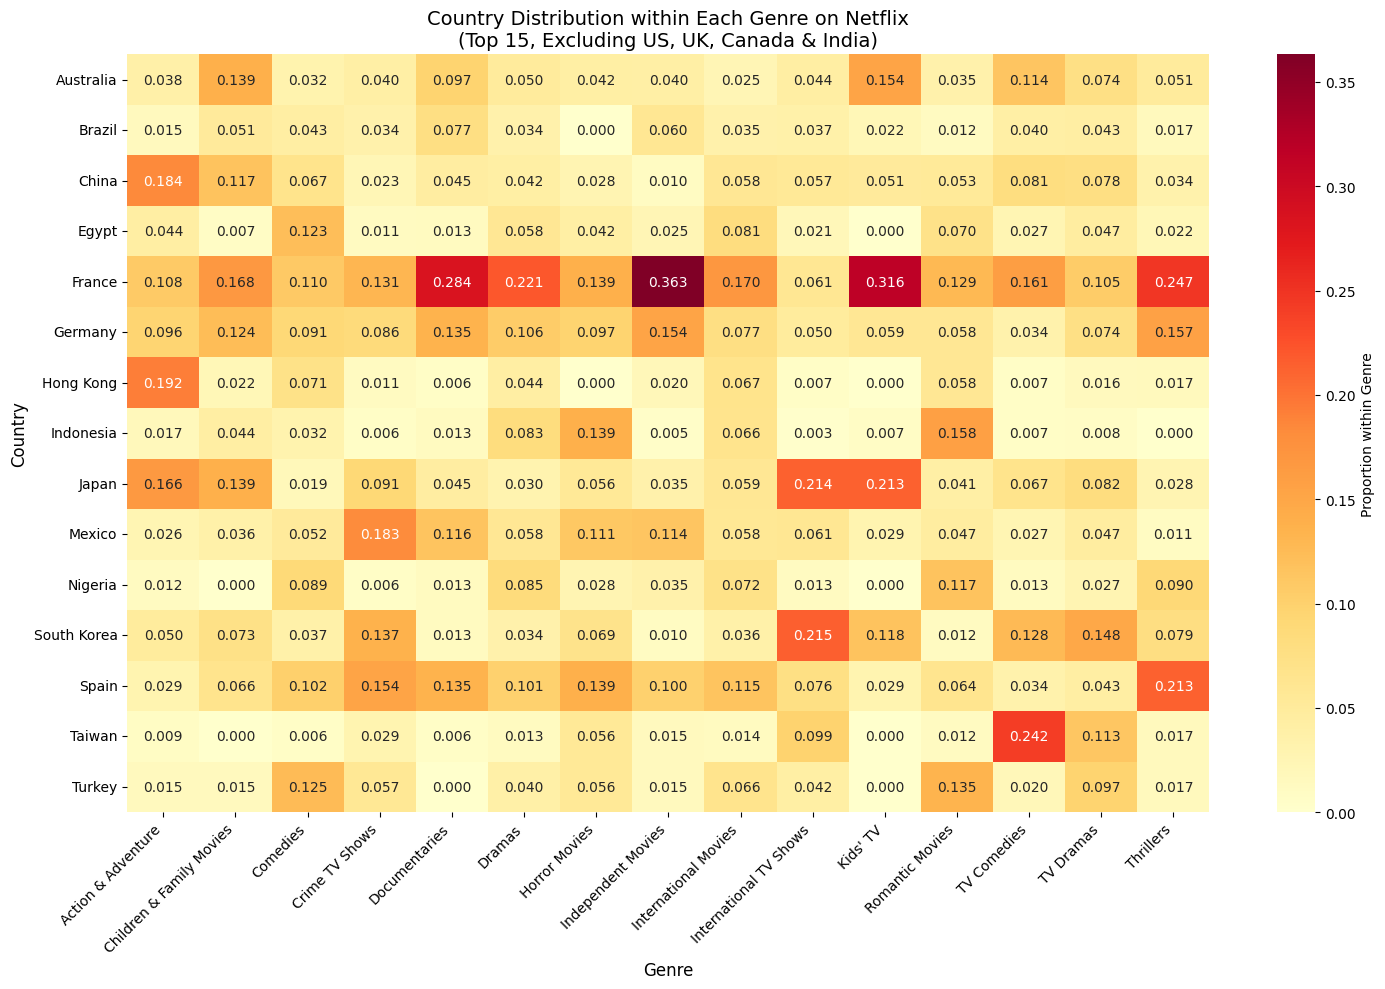


각 장르별 비율의 합:
listed_in
Action & Adventure          1.0
Children & Family Movies    1.0
Comedies                    1.0
Crime TV Shows              1.0
Documentaries               1.0
Dramas                      1.0
Horror Movies               1.0
Independent Movies          1.0
International Movies        1.0
International TV Shows      1.0
Kids' TV                    1.0
Romantic Movies             1.0
TV Comedies                 1.0
TV Dramas                   1.0
Thrillers                   1.0
dtype: float64


In [86]:
# 데이터 전처리 (이전과 동일)
country_genre_split = netflix_data.dropna(subset=['country', 'listed_in']).copy()
country_genre_split = country_genre_split.assign(
    country=country_genre_split['country'].str.split(', '),
    listed_in=country_genre_split['listed_in'].str.split(', ')
).explode('country').explode('listed_in')

# 미국, 영국, 캐나다, 인도를 제외하고 상위 15개 국가 선택
excluded_countries = ['United States', 'United Kingdom', 'Canada', 'India']
top_countries = country_genre_split[~country_genre_split['country'].isin(excluded_countries)]['country'].value_counts().head(15).index
top_genres = country_genre_split['listed_in'].value_counts().head(15).index

# 중복을 제거하고 국가-장르 매트릭스 생성
country_genre_matrix = pd.DataFrame(
    country_genre_split[
        country_genre_split['country'].isin(top_countries) & 
        country_genre_split['listed_in'].isin(top_genres)
    ].groupby(['country', 'listed_in']).size()
).reset_index().pivot(index='country', columns='listed_in', values=0).fillna(0)

# 열(장르)별로 정규화
country_genre_matrix_normalized = country_genre_matrix.div(country_genre_matrix.sum(axis=0), axis=1)

# 히트맵 시각화
plt.figure(figsize=(15, 10))
sns.heatmap(country_genre_matrix_normalized, 
            cmap='YlOrRd', 
            annot=True, 
            fmt='.3f',
            cbar_kws={'label': 'Proportion within Genre'})
plt.title('Country Distribution within Each Genre on Netflix\n(Top 15, Excluding US, UK, Canada & India)', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 검증을 위해 각 장르(열)의 합 출력
column_sums = country_genre_matrix_normalized.sum(axis=0)
print("\n각 장르별 비율의 합:")
print(column_sums)  # 모든 값이 1.0이어야 함

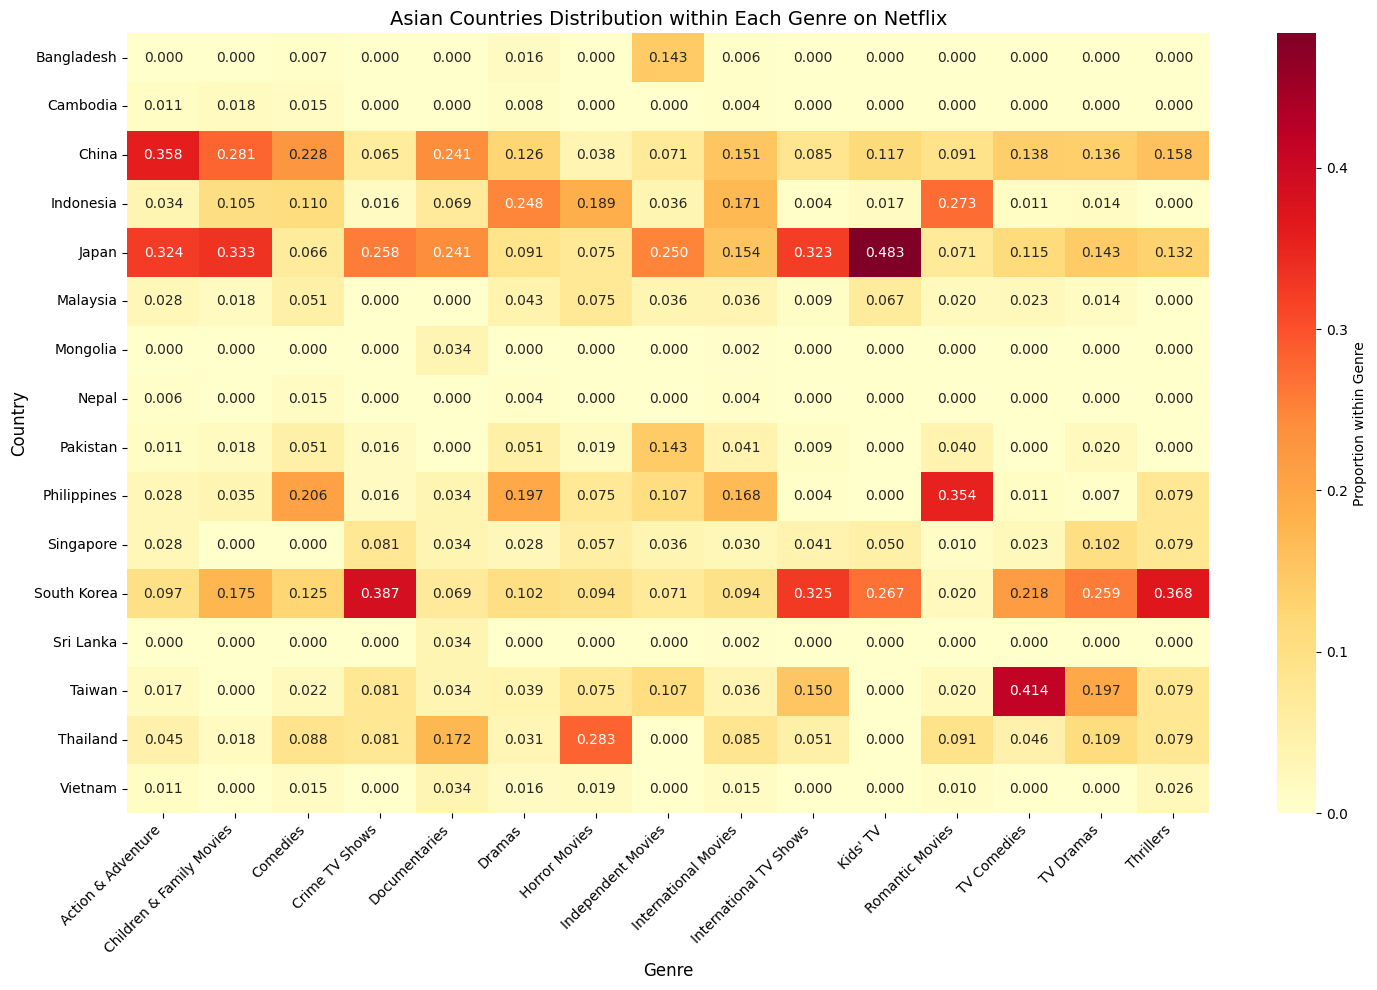


각 장르별 비율 합:
listed_in
Action & Adventure          1.0
Children & Family Movies    1.0
Comedies                    1.0
Crime TV Shows              1.0
Documentaries               1.0
Dramas                      1.0
Horror Movies               1.0
Independent Movies          1.0
International Movies        1.0
International TV Shows      1.0
Kids' TV                    1.0
Romantic Movies             1.0
TV Comedies                 1.0
TV Dramas                   1.0
Thrillers                   1.0
dtype: float64


In [93]:
asian_countries = [
    "Japan", "South Korea", "China", "Taiwan", "Thailand", "Philippines", 
    "Indonesia", "Malaysia", "Singapore", "Vietnam", "Cambodia", "Myanmar", 
    "Laos", "Brunei", "Mongolia", "Nepal", "Sri Lanka", "Pakistan", 
    "Bangladesh", "Maldives", "Bhutan"
]

country_genre_split = netflix_data.dropna(subset=['country', 'listed_in']).copy()
country_genre_split = country_genre_split.assign(
    country=country_genre_split['country'].str.split(', '),
    listed_in=country_genre_split['listed_in'].str.split(', ')
).explode('country').explode('listed_in')

# 아시아 국가들만 선택 (제외 국가 제외)
asian_data = country_genre_split[
    (country_genre_split['country'].isin(asian_countries)) & 
    (~country_genre_split['country'].isin(["US", "UK", "Canada", "India"]))
]

top_genres = country_genre_split['listed_in'].value_counts().head(15).index

country_genre_matrix = pd.DataFrame(
    asian_data[asian_data['listed_in'].isin(top_genres)]
    .groupby(['country', 'listed_in']).size()
).reset_index().pivot(index='country', columns='listed_in', values=0).fillna(0)

country_genre_matrix = country_genre_matrix[country_genre_matrix.sum(axis=1) > 0]

# 장르별로 정규화
country_genre_matrix_normalized = country_genre_matrix.div(country_genre_matrix.sum(axis=0), axis=1)

plt.figure(figsize=(15, 10))
sns.heatmap(country_genre_matrix_normalized, 
            cmap='YlOrRd', 
            annot=True, 
            fmt='.3f',
            cbar_kws={'label': 'Proportion within Genre'})
plt.title('Asian Countries Distribution within Each Genre on Netflix', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


column_sums = country_genre_matrix_normalized.sum(axis=0)
print("\n각 장르별 비율 합:")
print(column_sums)  # 모든 값이 1.0이어야 함

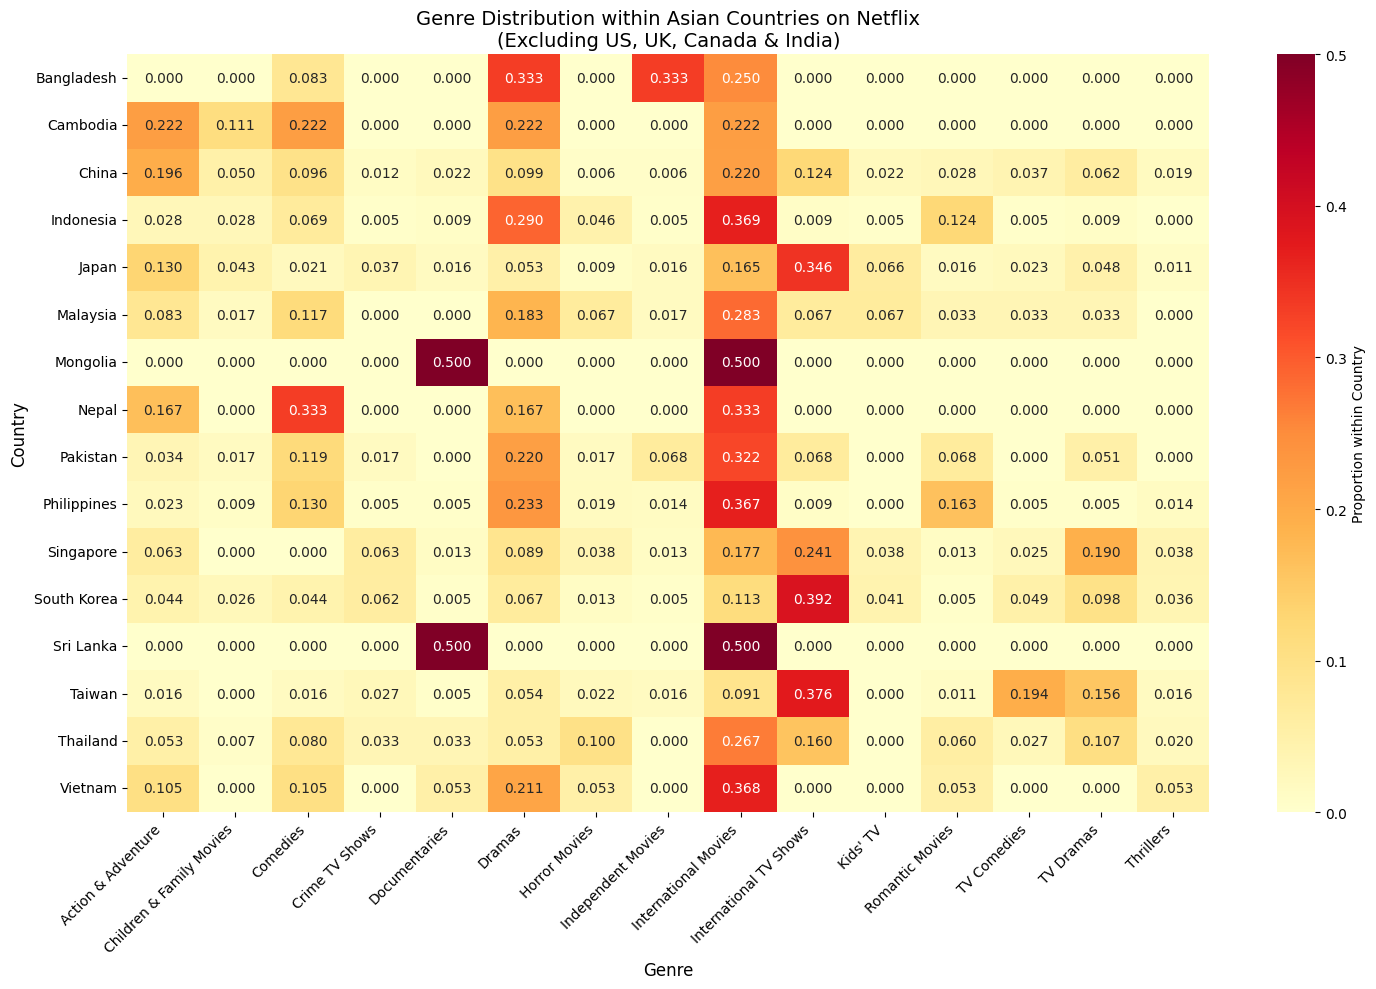


각 국가별 비율의 합:
country
Bangladesh     1.0
Cambodia       1.0
China          1.0
Indonesia      1.0
Japan          1.0
Malaysia       1.0
Mongolia       1.0
Nepal          1.0
Pakistan       1.0
Philippines    1.0
Singapore      1.0
South Korea    1.0
Sri Lanka      1.0
Taiwan         1.0
Thailand       1.0
Vietnam        1.0
dtype: float64


In [90]:
# 아시아 국가 리스트 정의
asian_countries = [
    "Japan", "South Korea", "China", "Taiwan", "Thailand", "Philippines", 
    "Indonesia", "Malaysia", "Singapore", "Vietnam", "Cambodia", "Myanmar", 
    "Laos", "Brunei", "Mongolia", "Nepal", "Sri Lanka", "Pakistan", 
    "Bangladesh", "Maldives", "Bhutan"
]

# 데이터 전처리
country_genre_split = netflix_data.dropna(subset=['country', 'listed_in']).copy()
country_genre_split = country_genre_split.assign(
    country=country_genre_split['country'].str.split(', '),
    listed_in=country_genre_split['listed_in'].str.split(', ')
).explode('country').explode('listed_in')

# 제외할 국가들
excluded_countries = ['United States', 'United Kingdom', 'Canada', 'India']

# 아시아 국가들만 선택 (제외 국가 제외)
asian_data = country_genre_split[
    (country_genre_split['country'].isin(asian_countries)) & 
    (~country_genre_split['country'].isin(excluded_countries))
]

# 상위 장르 선택
top_genres = country_genre_split['listed_in'].value_counts().head(15).index

# 국가-장르 매트릭스 생성
country_genre_matrix = pd.DataFrame(
    asian_data[asian_data['listed_in'].isin(top_genres)]
    .groupby(['country', 'listed_in']).size()
).reset_index().pivot(index='country', columns='listed_in', values=0).fillna(0)

# 데이터가 있는 국가만 선택 (행의 합이 0인 국가 제외)
country_genre_matrix = country_genre_matrix[country_genre_matrix.sum(axis=1) > 0]

# 행(국가)별로 정규화 - 각 국가의 장르 비율 합이 1이 되도록
country_genre_matrix_normalized = country_genre_matrix.div(country_genre_matrix.sum(axis=1), axis=0)

# 히트맵 시각화
plt.figure(figsize=(15, 10))
sns.heatmap(country_genre_matrix_normalized, 
            cmap='YlOrRd', 
            annot=True, 
            fmt='.3f',
            cbar_kws={'label': 'Proportion within Country'})
plt.title('Genre Distribution within Asian Countries on Netflix\n(Excluding US, UK, Canada & India)', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 검증을 위해 각 국가(행)의 합 출력
row_sums = country_genre_matrix_normalized.sum(axis=1)
print("\n각 국가별 비율의 합:")
print(row_sums)  # 모든 값이 1.0이어야 함

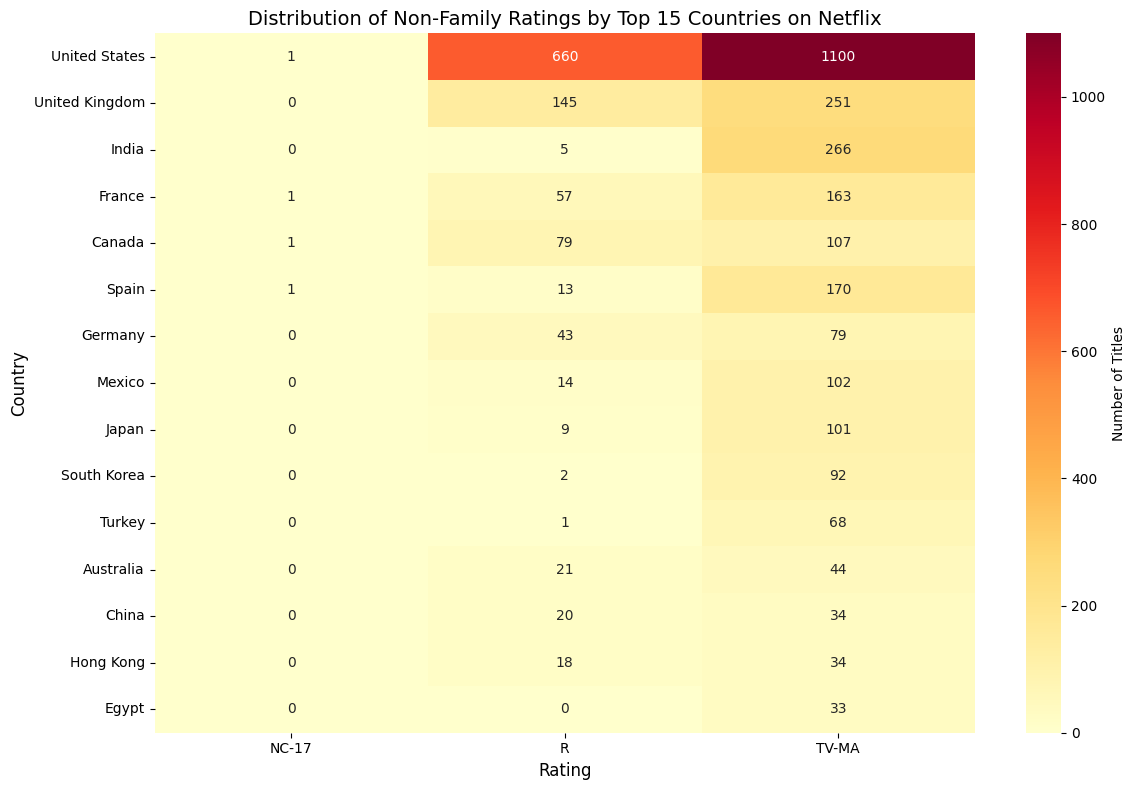

In [76]:
# Non-family 관련 rating 분포 히트맵
import seaborn as sns

# 데이터 전처리
country_rating_split = netflix_data.dropna(subset=['country', 'rating']).copy()
country_rating_split = country_rating_split.assign(
    country=country_rating_split['country'].str.split(', ')
).explode('country')

# Non-family 관련 rating 목록
non_family_ratings = ['R', 'TV-MA', 'NC-17', 'UNRATED']

# 상위 15개 국가 선택
top_countries = country_rating_split['country'].value_counts().head(15).index

# 국가-rating 매트릭스 생성
country_rating_matrix = pd.DataFrame(
    country_rating_split[
        country_rating_split['country'].isin(top_countries) & 
        country_rating_split['rating'].isin(non_family_ratings)
    ].groupby(['country', 'rating']).size()
).reset_index().pivot(index='country', columns='rating', values=0).fillna(0)

# 국가별 총 콘텐츠 수로 정렬
country_totals = country_rating_matrix.sum(axis=1).sort_values(ascending=False)
country_rating_matrix = country_rating_matrix.loc[country_totals.index]

# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(country_rating_matrix, cmap='YlOrRd', annot=True, fmt='.0f', cbar_kws={'label': 'Number of Titles'})
plt.title('Distribution of Non-Family Ratings by Top 15 Countries on Netflix', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.show()

전세계 대비 미국의 Non-Family 등급 비중:

R:
미국: 660개
전세계: 1225개
비중: 53.9%

TV-MA:
미국: 1100개
전세계: 3475개
비중: 31.7%

NC-17:
미국: 1개
전세계: 5개
비중: 20.0%

UNRATED:
미국: 0개
전세계: 0개
비중: 0.0%


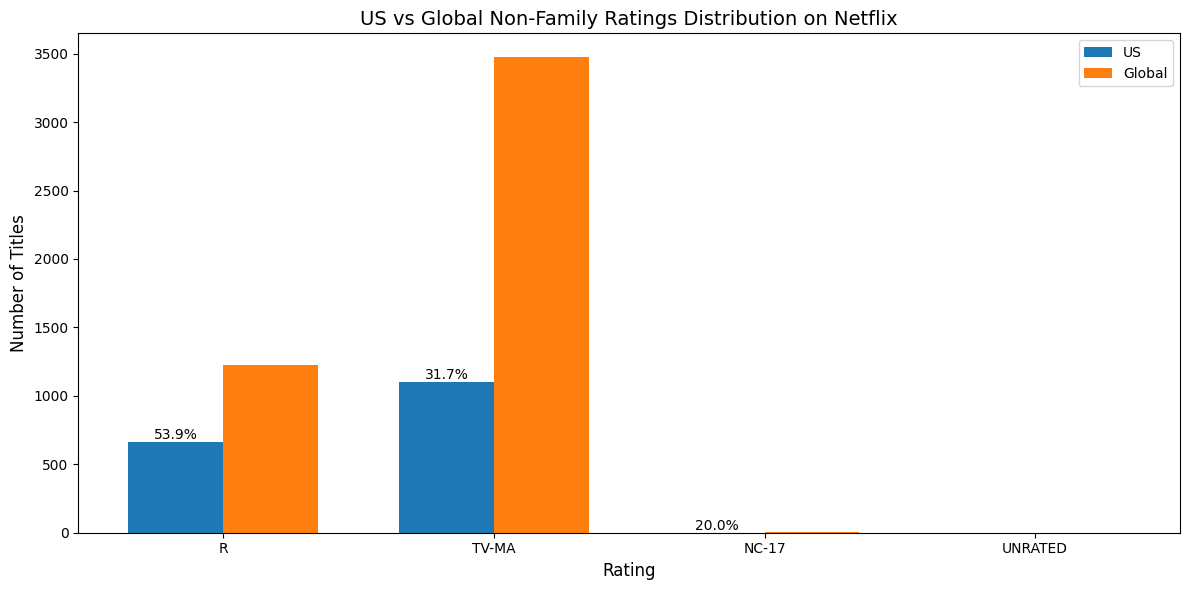

In [78]:
# 전세계 대비 미국의 non-family 등급 비중 분석
import numpy as np
import seaborn as sns

# 데이터 전처리
country_rating_split = netflix_data.dropna(subset=['country', 'rating']).copy()
country_rating_split = country_rating_split.assign(
    country=country_rating_split['country'].str.split(', ')
).explode('country')

# Non-family 관련 rating 목록
non_family_ratings = ['R', 'TV-MA', 'NC-17', 'UNRATED']

# 전세계 non-family 등급 카운트
global_non_family = country_rating_split[country_rating_split['rating'].isin(non_family_ratings)]['rating'].value_counts()

# 미국 데이터의 non-family 등급 카운트
us_data = country_rating_split[country_rating_split['country'] == 'United States']
us_non_family = us_data[us_data['rating'].isin(non_family_ratings)]['rating'].value_counts()

# 비율 계산
us_global_ratio = (us_non_family / global_non_family * 100).round(1)

# 결과 출력
print("전세계 대비 미국의 Non-Family 등급 비중:")
for rating in non_family_ratings:
    print(f"\n{rating}:")
    print(f"미국: {us_non_family.get(rating, 0)}개")
    print(f"전세계: {global_non_family.get(rating, 0)}개")
    print(f"비중: {us_global_ratio.get(rating, 0):.1f}%")

# 시각화
plt.figure(figsize=(12, 6))
x = np.arange(len(non_family_ratings))
width = 0.35

plt.bar(x - width/2, [us_non_family.get(r, 0) for r in non_family_ratings], width, label='US')
plt.bar(x + width/2, [global_non_family.get(r, 0) for r in non_family_ratings], width, label='Global')

plt.title('US vs Global Non-Family Ratings Distribution on Netflix', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(x, non_family_ratings)
plt.legend()

# 비율 표시
for i, rating in enumerate(non_family_ratings):
    if rating in us_non_family:
        plt.text(i - width/2, us_non_family[rating], 
                f'{us_global_ratio[rating]:.1f}%', 
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [79]:
# 국가별 시청 연령 다양성 분석
def age_rating_diversity():
    # 데이터 전처리
    rating_split = netflix_data.dropna(subset=['country', 'rating']).copy()
    rating_split = rating_split.assign(
        country=rating_split['country'].str.split(', ')
    ).explode('country')
    
    # 국가별 연령 등급 분포 분석
    rating_distribution = pd.crosstab(
        rating_split['country'], 
        rating_split['rating'], 
        normalize='index'
    ) * 100
    
    return rating_distribution

In [97]:
# 날짜 데이터 전처리
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])

# 2020-2021년 데이터 필터링
netflix_recent = netflix_data[netflix_data['date_added'].dt.year.isin([2020, 2021])]

# 디즈니+ 데이터 로드
disney_data = pd.read_csv('disney_plus_titles.csv')

# 장르 분포 비교 시각화
plt.figure(figsize=(15, 6))

# Netflix 장르 분포
plt.subplot(1, 2, 1)
netflix_genres = netflix_recent['listed_in'].str.split(', ').explode().value_counts().head(10)
netflix_genres.plot(kind='bar')
plt.title('Netflix Top Genres (2020-2021)')
plt.xticks(rotation=45)

# Disney+ 장르 분포
plt.subplot(1, 2, 2)
disney_genres = disney_data['listed_in'].str.split(', ').explode().value_counts().head(10)
disney_genres.plot(kind='bar')
plt.title('Disney+ Top Genres')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

ValueError: time data " August 4, 2017" doesn't match format "%B %d, %Y", at position 1442. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [95]:


# 디즈니+ 데이터 로드
disney_data = pd.read_csv('disney_plus_titles.csv')

# 장르 분포 비교 시각화
plt.figure(figsize=(15, 6))

# Netflix 장르 분포
plt.subplot(1, 2, 1)
netflix_genres = netflix_recent['listed_in'].str.split(', ').explode().value_counts().head(10)
netflix_genres.plot(kind='bar')
plt.title('Netflix Top Genres (2020-2021)')
plt.xticks(rotation=45)

# Disney+ 장르 분포
plt.subplot(1, 2, 2)
disney_genres = disney_data['listed_in'].str.split(', ').explode().value_counts().head(10)
disney_genres.plot(kind='bar')
plt.title('Disney+ Top Genres')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

AttributeError: Can only use .dt accessor with datetimelike values

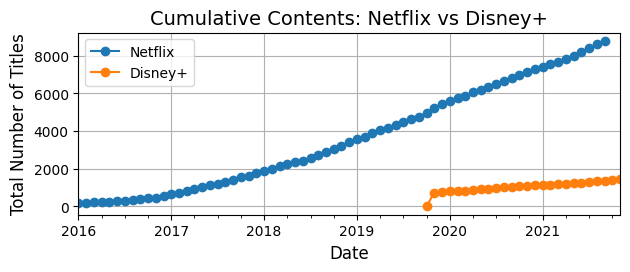


Content Addition Statistics:

Netflix:
Total content: 8,797
Average monthly additions: 81.5

Disney+:
Total content: 1,447
Average monthly additions: 55.7


In [101]:
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'], format='mixed')
disney_data['date_added'] = pd.to_datetime(disney_data['date_added'], format='mixed')

netflix_monthly = netflix_data.groupby(netflix_data['date_added'].dt.to_period('M')).size()
disney_monthly = disney_data.groupby(disney_data['date_added'].dt.to_period('M')).size()

netflix_cumulative = netflix_monthly.cumsum()
disney_cumulative = disney_monthly.cumsum()

plt.subplot(2, 1, 2)
netflix_cumulative.plot(label='Netflix', marker='o')
disney_cumulative.plot(label='Disney+', marker='o')
plt.title('Cumulative Contents: Netflix vs Disney+', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Number of Titles', fontsize=12)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.xlim(left=pd.Timestamp('2016-01-01'))  
plt.show()

# 기본 통계 출력
print("\nContent Addition Statistics:")
print("\nNetflix:")
print(f"Total content: {netflix_cumulative.iloc[-1]:,}")
print(f"Average monthly additions: {netflix_monthly.mean():.1f}")
print("\nDisney+:")
print(f"Total content: {disney_cumulative.iloc[-1]:,}")
print(f"Average monthly additions: {disney_monthly.mean():.1f}")